# Problem Statement

## Overview
<p align="justify">Mempertimbangkan tingkat persaingan yang berlaku di domain E-Commerce Business-to-Consumer (B2C) dan investasi besar yang diperlukan untuk menarik pelanggan baru, perusahaan sekarang memberikan lebih banyak fokus untuk mengurangi tingkat churn pelanggan. Churn rate adalah rasio pelanggan yang berhenti berlangganan dengan perusahaan dalam periode waktu tertentu. Salah satu mekanisme terbaik untuk mempertahankan pelanggan saat ini adalah mengidentifikasi potensi churn dan merespons dengan cepat untuk mencegahnya. Mendeteksi tanda-tanda awal dari potensi churn, mengenali apa yang dicari pelanggan melalui pergerakan, dan meningkatkan pelayanan untuk meningkatkan kepuasan para customer sangat penting untuk mempertahankan bisnis di era persaingan ini. Perusahaan E-Commerce biasanya memiliki volume besar data yang berkaitan dengan pelanggan mereka yang sudah ada seperti riwayat transaksi, riwayat pencarian, periodisitas pembelian, dan lain-lain. Teknik data mining dapat diterapkan untuk menganalisis perilaku pelanggan dan untuk memprediksi pengurangan pelanggan potensial sehingga strategi pemasaran khusus dapat diadopsi untuk mempertahankannya.</p>

## Business Question
1. Berapa persen customer yang memilih untuk churn ?
2. Apakah jenis kelamin berpengaruh terhadap kemungkinan customer untuk churn?
3. Apakah ada pengaruh antara tenure dengan churn rate?
4. Apakah jarak rumah customer dengan warehouse memiliki pengaruh terhadap churn?
5. Apakah customer yang komplain cenderung akan memilih untuk churn ?
6. Bagaimana churn rate berdasarkan kategori produk yang dibeli customer ?
7. Bagaiman churn rate berdasarkan metode pembayaran yang digunakan

## Goal
1. Mengidentifikasi penyebab churn.
2. Membangun machine learning untuk mendeteksi customer yang akan churn.


# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 

import warnings
warnings.filterwarnings('ignore')
%load_ext autotime
sns.set_theme()
pd.set_option('display.max_columns', 100)

time: 16 ms (started: 2022-02-06 14:30:55 +07:00)


# Data Exploration

In [2]:
#Load Dataset
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm', engine='openpyxl')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


time: 7.66 s (started: 2022-02-06 14:30:55 +07:00)


In [3]:
# Dataframe dimension
df.shape

(5630, 20)

time: 0 ns (started: 2022-02-06 14:31:03 +07:00)


In [4]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Statistics description
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


time: 156 ms (started: 2022-02-06 14:31:03 +07:00)


# Data Cleaning

## Handling Missing Values

In [6]:
# Number of missing values
num_null = df.isnull().sum()

# percentage null values
pct_null = round((num_null/df.shape[0] * 100), 2)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,DaySinceLastOrder,307,5.45
1,OrderAmountHikeFromlastYear,265,4.71
2,Tenure,264,4.69
3,OrderCount,258,4.58
4,CouponUsed,256,4.55
5,HourSpendOnApp,255,4.53
6,WarehouseToHome,251,4.46


time: 47 ms (started: 2022-02-06 14:31:04 +07:00)


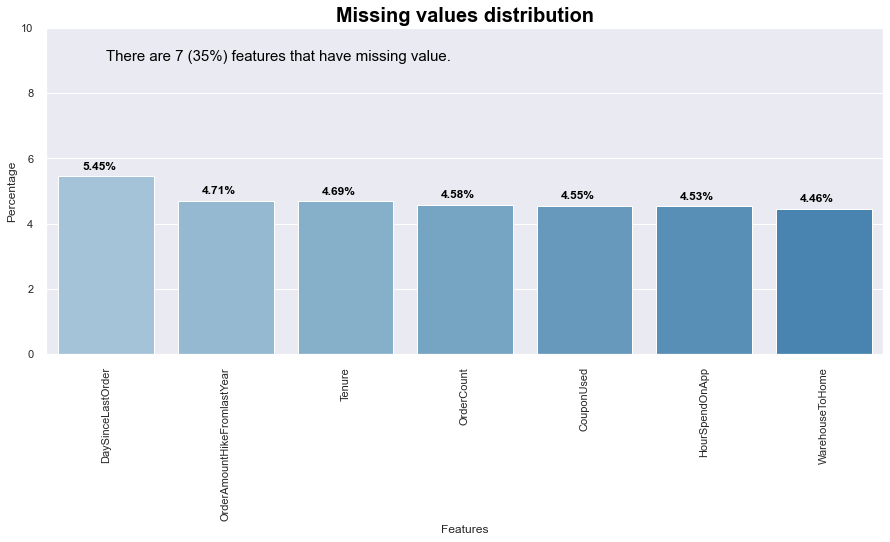

time: 641 ms (started: 2022-02-06 14:31:04 +07:00)


In [7]:
# Plotting number of missing data
fig, ax = plt.subplots(figsize=(15,6))

g = sns.barplot(x = 'Features',y='Percentage',data=df_null,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

# percentage of missing values
x = np.arange(len(df_null['Features']))
y = df_null['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 12, color='black', fontweight='bold')
    
text = 'There are 7 (35%) features that have missing value.'

ax.text(0,9,text,horizontalalignment='left',color='black',fontsize=15, fontweight='normal')
ax.set_title('Missing values distribution', color='black', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(0, 10)
plt.show()

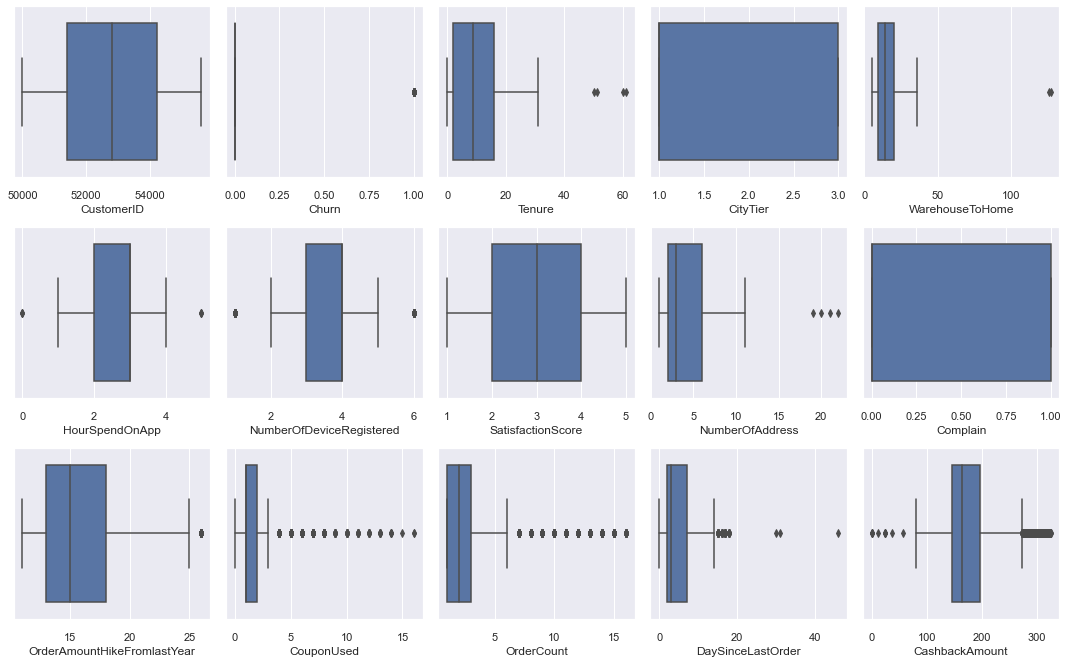

time: 8.62 s (started: 2022-02-06 14:31:05 +07:00)


In [8]:
# outliers check using boxplot
num = df.select_dtypes('number').columns

plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();

Karena terdapat banyak outliers dan, maka gunakan nilai median untuk melakukan imputasi missing values.

In [9]:
# List of features have a missing values
num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Imputation missing values using median
for column in num_columns:
    df.loc[df[column].isnull(), column] = df[column].median()

df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                         False
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                False
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                 False
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear    False
CouponUsed                     False
OrderCount                     False
DaySinceLastOrder              False
CashbackAmount                 False
dtype: bool

time: 32 ms (started: 2022-02-06 14:31:14 +07:00)


## Duplicated Data

In [10]:
# Data Duplicated
df.duplicated().sum()

0

time: 32 ms (started: 2022-02-06 14:31:15 +07:00)


## Features Distribution

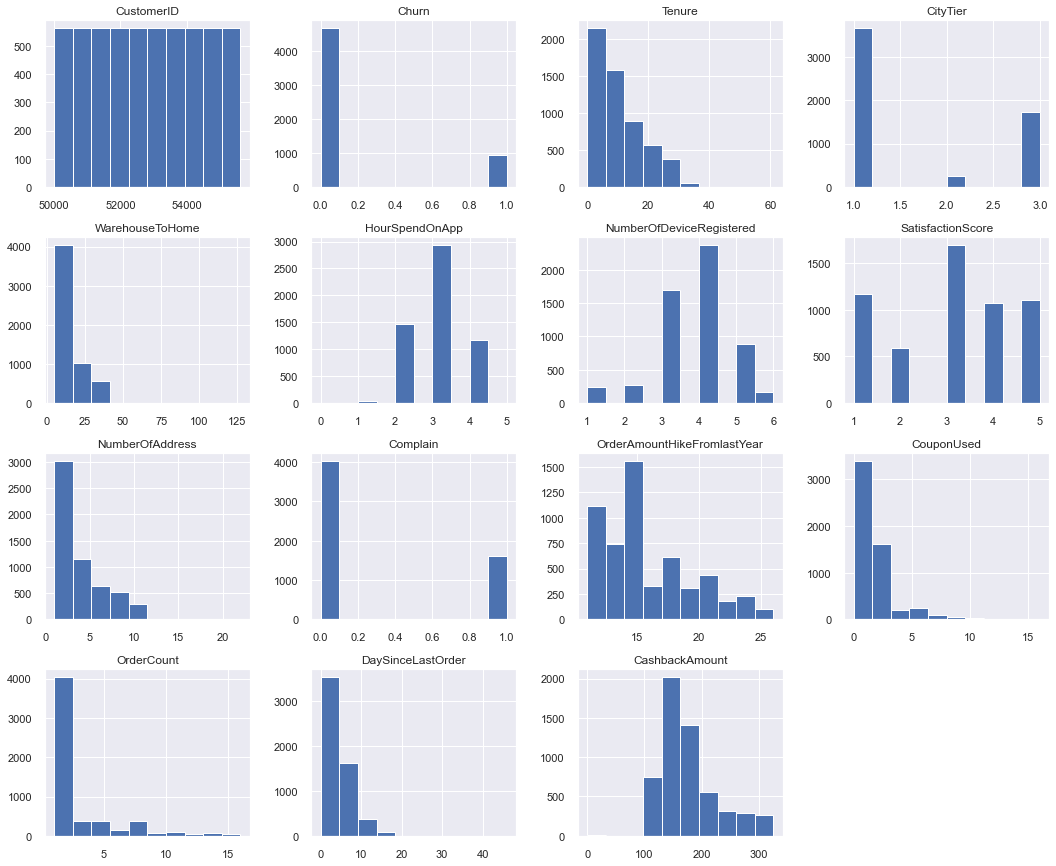

time: 4.97 s (started: 2022-02-06 14:31:15 +07:00)


In [11]:
df.hist(bins=10,figsize=(18,15));

Karena banyak features yang seharunya bertipe data integer, maka lakukan converting data type.

In [12]:
# Convert data type to integer 
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype('int64')
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype('int64')
df['Tenure'] = df['Tenure'].astype('int64')
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype('int64')
df['CouponUsed'] = df['CouponUsed'].astype('int64')
df['OrderCount'] = df['OrderCount'].astype('int64')
df['WarehouseToHome'] = df['WarehouseToHome'].astype('int64')

time: 0 ns (started: 2022-02-06 14:31:20 +07:00)


## Inconsistent Data

In [13]:
# Check inconsistent data
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 CustomerID [50001 50002 50003 ... 55628 55629 55630]
 Churn [1 0]
 Tenure [ 4  9  0 13 11 19 20 14  8 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]
 PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
 CityTier [3 1 2]
 WarehouseToHome [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  27
  17  23  33  19  35  24  16  25  32  34   5  21 126   7  36 127]
 PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 Gender ['Female' 'Male']
 HourSpendOnApp [3 2 1 0 4 5]
 NumberOfDeviceRegistered [3 4 5 2 1 6]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
 SatisfactionScore [2 3 5 4 1]
 MaritalStatus ['Single' 'Divorced' 'Married']
 NumberOfAddress [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
 Complain [1 0]
 OrderAmountHikeFromlastYear [11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26]
 CouponUsed [ 1  0  4  2  9  6 11  7 12 10  5  3 13 15  8

In [14]:
# Replace CC to CreditCard
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card'})

# Replace COD to  Cash On Delivery
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD':'Cash on Delivery'})

# Replace Mobile to Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

# Replace Phone to Mobile Phone
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

time: 15 ms (started: 2022-02-06 14:31:21 +07:00)


## Handling Outliers

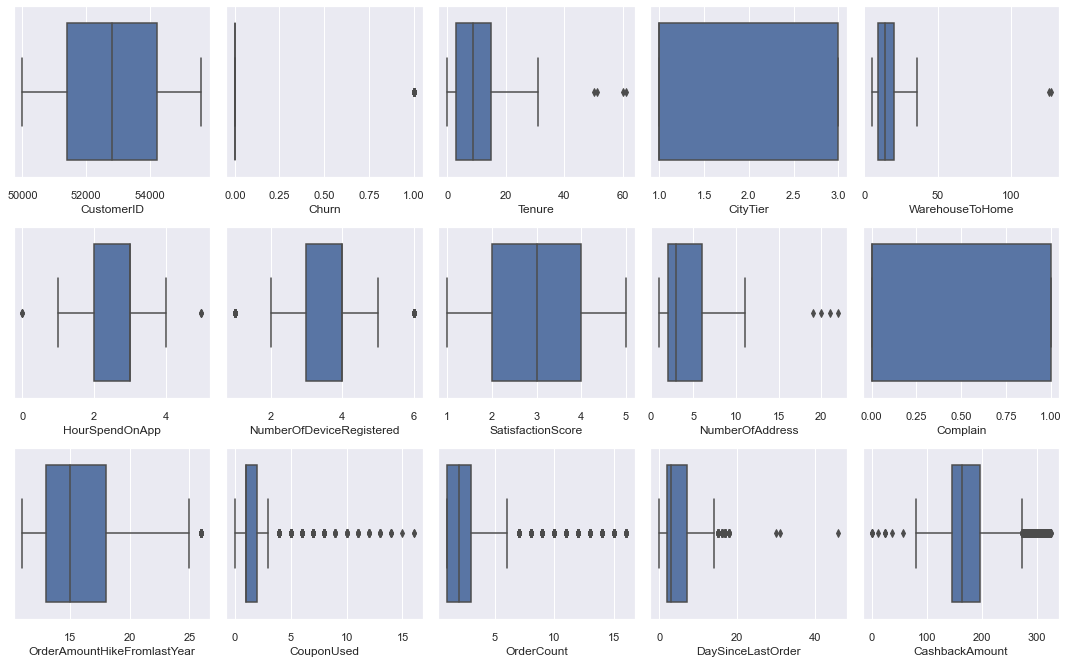

time: 7.08 s (started: 2022-02-06 14:31:21 +07:00)


In [15]:
# outliers check using boxplot
num = df.select_dtypes('number').columns

# distribution of features
plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();

Terdapat nilai ekstreme atau outliers pada data. Maka kita gunakan zscore untuk menghilangkan data outliers tersebut.

In [16]:
# z-score
z = np.abs(stats.zscore(df[num]))

# Data dimension before handling outliers
print("Data shape sebelum di hilangkan outliers {}".format(df.shape))

# Handling outliers using z_score with treshold = 3
df= df[(z < 3).all(axis=1)]

# Change outliers pada Hour spend on App menjadi nilai quantile 99%
df["HourSpendOnApp"].values[df["HourSpendOnApp"].values>4]=4

# Data dimension after handling outliers
print("Data shape setelah handling outliers {}".format(df.shape))

Data shape sebelum di hilangkan outliers (5630, 20)
Data shape setelah handling outliers (5350, 20)
time: 16 ms (started: 2022-02-06 14:31:28 +07:00)


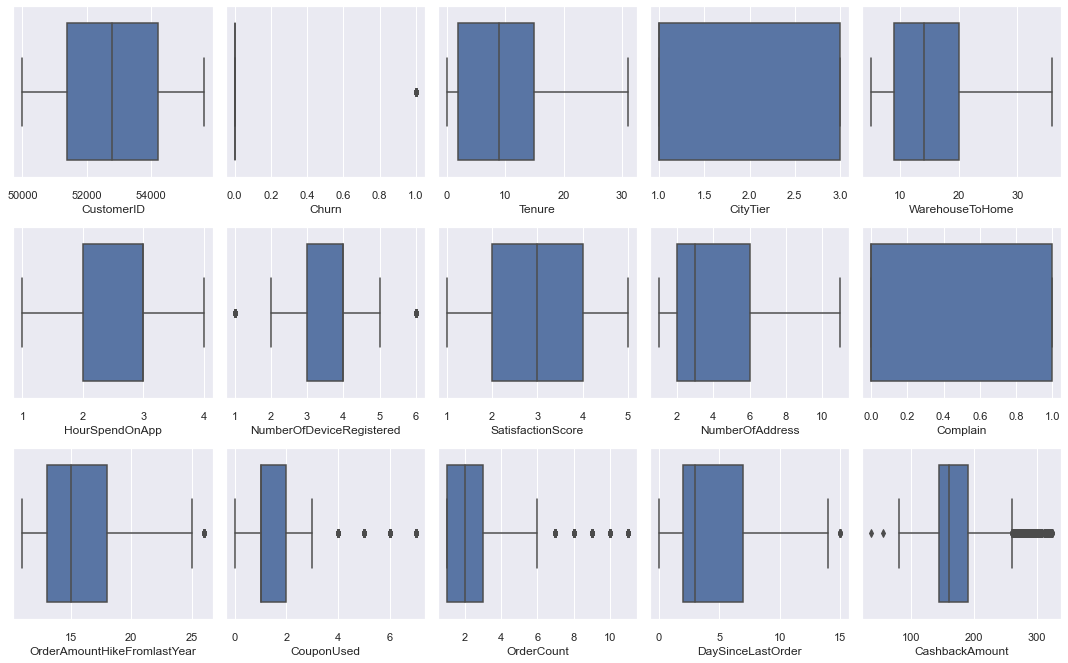

time: 8.08 s (started: 2022-02-06 14:31:29 +07:00)


In [17]:
# outliers check using boxplot
num = df.select_dtypes('number').columns

# distribution of features
plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();

In [18]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                           int64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                  int64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                   int64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int64
CouponUsed                       int64
OrderCount                       int64
DaySinceLastOrder                int64
CashbackAmount                 float64
dtype: object

time: 16 ms (started: 2022-02-06 14:31:37 +07:00)


Setelah dilakukan handling outliers, data bersisa 5350 row dari 5630 row sebelum outliers dibuang atau data yang dibuang sebanyak 280 rows, sehingga dataset masih mengandung informasi sebesar 95%. Sehingga penanganan outliers dengan menggunakan metode z score dan capping tidak banyak membuang informasi pada dataset.

# Exploratory Data Analysis

### Proportion of Customer Churn

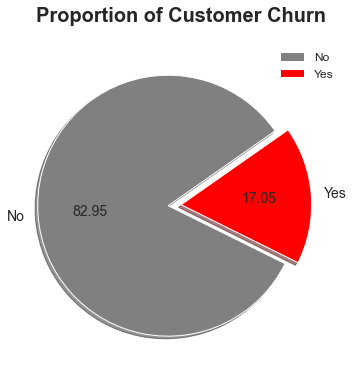

time: 563 ms (started: 2022-02-06 14:31:37 +07:00)


In [19]:
#check proportion of Churn
plt.figure(figsize=(6,6))
plt.pie(
        df["Churn"].value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["gray","red"], 
        startangle=35)

plt.title("Proportion of Customer Churn",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

In [20]:
df[df['Churn'] == 1]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,55599,1,1,Computer,3,16,E wallet,Male,3,4,Mobile Phone,5,Married,3,0,20,2,2,1,142.90
5602,55603,1,1,Mobile Phone,1,8,Credit Card,Male,3,4,Mobile Phone,1,Married,11,1,15,3,3,3,172.87
5604,55605,1,20,Mobile Phone,1,14,Cash on Delivery,Male,4,4,Mobile Phone,3,Married,10,0,12,7,10,9,148.39
5612,55613,1,14,Computer,3,8,Debit Card,Male,4,4,Laptop & Accessory,3,Married,9,0,13,2,2,2,192.28


time: 62 ms (started: 2022-02-06 14:31:38 +07:00)


## Define Function

In [21]:
def univariate_analysis(feature, rotation=0, title='', xlabel=''):
    temp_count = df[feature].value_counts()
    temp_pct = df[feature].value_counts(normalize=True)
    df_temp_count = pd.DataFrame({
        feature:temp_count.index,
        'Total':temp_count.values,
        '% Values':(temp_pct * 100)}) 

    print(df_temp_count)

    # Calculate the percentage of Churn = 1 per category value
    cat_pct = df[[feature, 'Churn']].groupby([feature],as_index=False).mean()
    cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)
    cat_pct.sort_values('Churn', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s =  sns.countplot(data=df, x=feature, ax=ax1, hue='Churn', order=cat_pct[feature], palette=['b', 'r'])

    # Define common styling
    ax1.set_title('Distribution of ' + title, fontdict=({'fontsize':20, 'fontweight':5, 'color':'black'}))
    ax1.set_xlabel(feature + xlabel, fontsize=15)
    ax1.legend(['Not Churn', 'Churn'])
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)

    # 2. Subplot 2: Percentage of customer churn within the categorical column
    x = np.arange(len(cat_pct[feature]))
    y = cat_pct['Churn']
    for i, v in enumerate(y):
        ax2.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 10, color='black', fontweight='bold')

    s = sns.barplot(data=cat_pct, x=feature, y='Churn', ax=ax2, order=cat_pct[feature])
    # Define common styling
    ax2.set_title('Churn Rate (%) by ' + title, fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
    ax2.set_ylabel('Percent of Churn')
    ax2.set_xlabel(feature + xlabel, fontsize=15)
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)
    plt.show()


time: 0 ns (started: 2022-02-06 14:31:38 +07:00)


In [22]:
def univariate_analysis_1(feature, rotation=0):
    temp_count = df[feature].value_counts()
    temp_pct = df[feature].value_counts(normalize=True)
    df_temp_count = pd.DataFrame({
        feature:temp_count.index,
        'Total':temp_count.values,
        '% Values':(temp_pct * 100)}) 

    print(df_temp_count)

    # Calculate the percentage of Converted=1 per category value
    cat_pct = df[df['Churn'] == 1] 
    cat_pct = cat_pct[feature].value_counts(normalize=True).reset_index()
    cat_pct.columns = [feature, 'Churn']
    cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)
    cat_pct.sort_values('Churn', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s =  sns.countplot(data=df, x=feature, ax=ax1, hue='Churn', order=cat_pct[feature], palette=['b', 'r'])

    # Define common styling
    ax1.set_title(feature, fontdict=({'fontsize':20, 'fontweight':5, 'color':'black'}))
    ax1.set_xlabel(feature, fontsize=15)
    ax1.legend(['Not Churn', 'Churn'])
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)

    # 2. Subplot 2: Percentage of customer churn within the categorical column
    x = np.arange(len(cat_pct[feature]))
    y = cat_pct['Churn']
    for i, v in enumerate(y):
        ax2.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 10, color='black', fontweight='bold')

    s = sns.barplot(data=cat_pct, x=feature, y='Churn', ax=ax2, order=cat_pct[feature])
    # Define common styling
    ax2.set_title(feature + '(Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
    ax2.set_ylabel('Percent of Churn')
    ax2.set_xlabel(feature, fontsize=15)
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)
    plt.show()


time: 15 ms (started: 2022-02-06 14:31:39 +07:00)


In [23]:
def univariate_analysis_num(feature, bins='auto'):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('Distribution of ' + feature, fontsize=20, color='black')
    
    sns.histplot(data=df, x=feature, kde=True, ax=ax[0], bins=bins)
    ax[0].set_title(feature, fontsize=15, pad=15)
    ax[0].set_xlabel(feature)

    sns.histplot(data=df, x=feature, kde=True, hue='Churn', ax=ax[1], bins=bins)
    ax[1].set_title(feature + ' by Customer Churn', fontsize=15, pad=15)
    ax[1].set_xlabel(feature)
    ax[1].legend(['Churn', 'Not Churn'])
    plt.show()

time: 0 ns (started: 2022-02-06 14:31:40 +07:00)


## Univariate Analysis

### Categorical Features

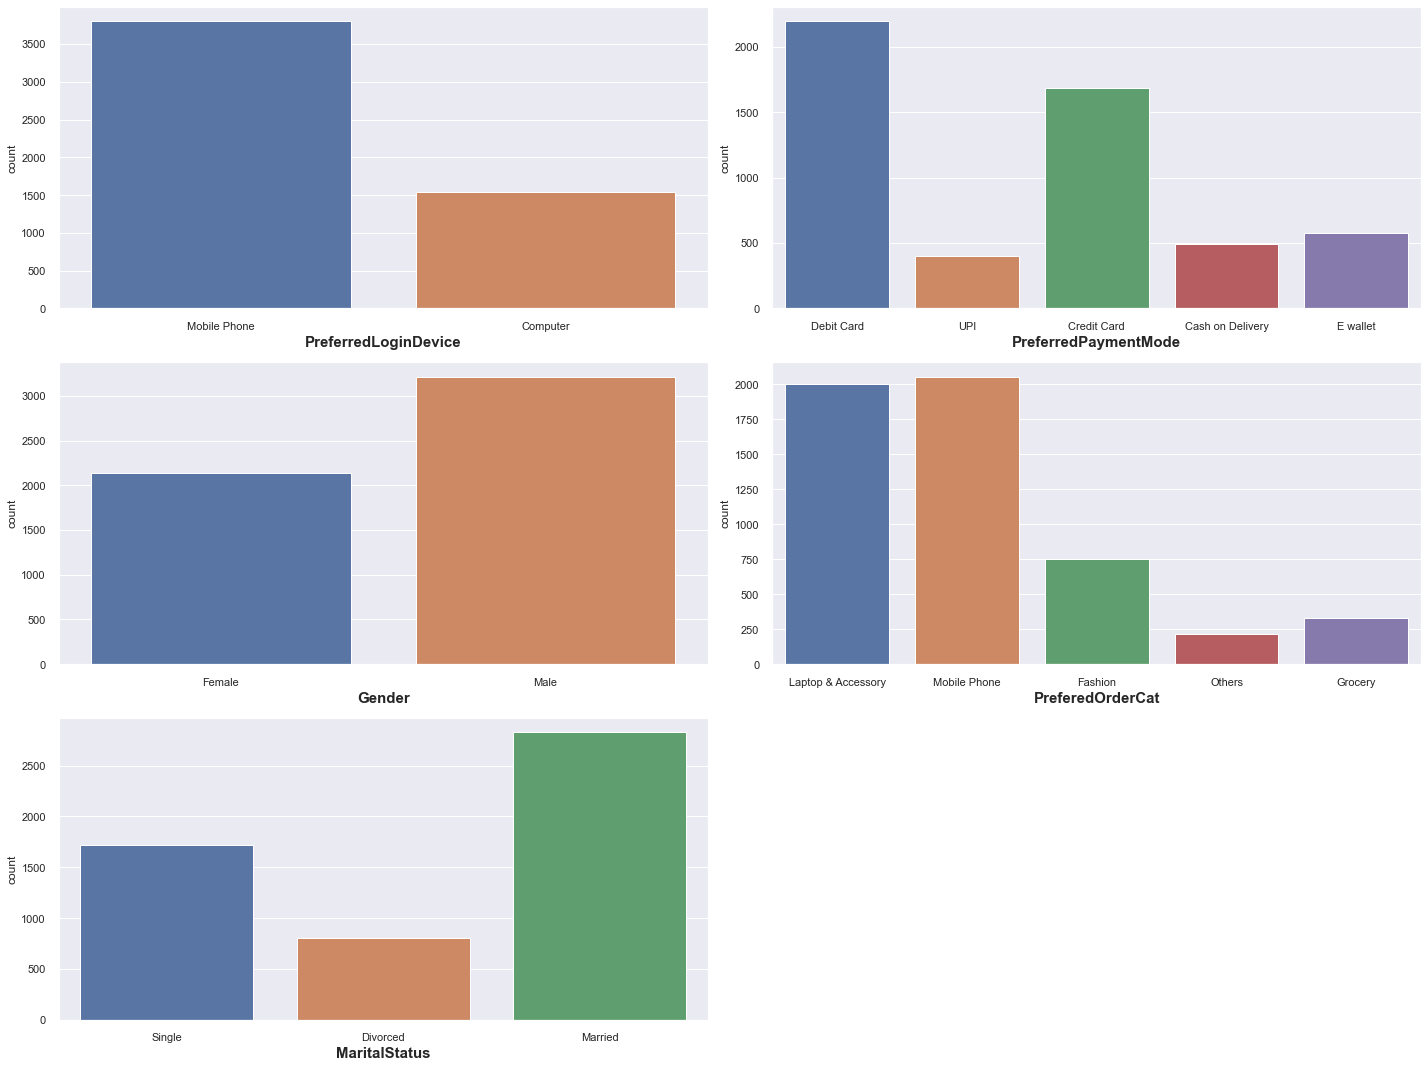

time: 2.44 s (started: 2022-02-06 14:31:40 +07:00)


In [24]:
# Categorical features
cat = df.select_dtypes('object').columns

plt.figure(figsize=(20,15))
for i in range(0,len(cat)):
    plt.subplot(3,len(cat)/2,i+1)
    sns.countplot(data=df,x=cat[i])
    plt.xlabel(cat[i], fontsize=15, fontweight='bold')
    plt.tight_layout();

Dari variable categoric didapatkan informasi: <br>
1. Customer yang menggunakan Mobile phone untuk login lebih banyak dibandingkan menggunakan computer. <br>
2. Customer yang melakukan pembayaran via debit card lebih banyak disusul dengan menggunakan Credit card. <br>
3. Customer berjenis kelamin laki-laki lebih banyak dibandingkan dengan perempuan. <br>
4. Barang kategori Laptop&Accessory, dan Mobile Phone adalah yang paling banyak dibeli oleh customer. <br>
5. Customer yang telah menikah lebih banyak dari pada lajang dan cerai.

#### PreferredLoginDevice

             PreferredLoginDevice  Total   % Values
Mobile Phone         Mobile Phone   3803  71.084112
Computer                 Computer   1547  28.915888


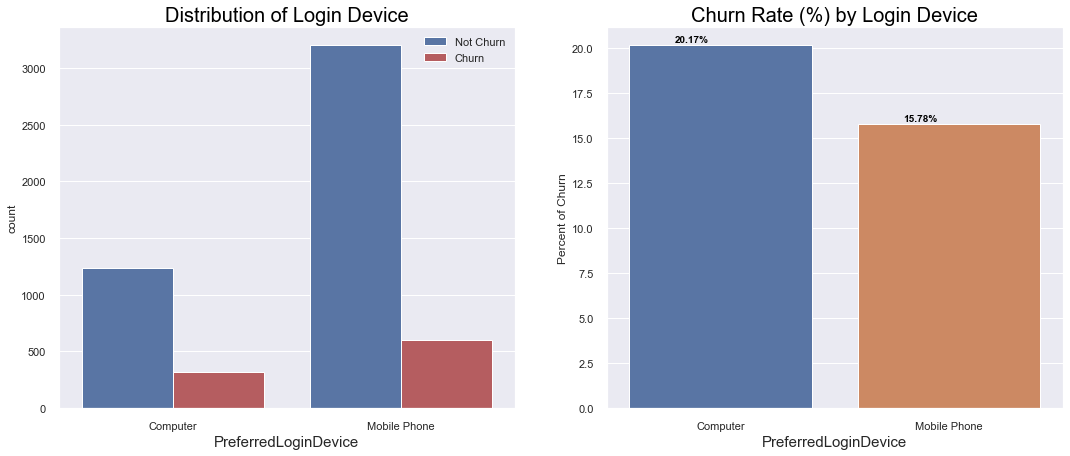

time: 1.3 s (started: 2022-02-06 14:31:43 +07:00)


In [25]:
# Univariate analysis for PreferredLoginDevice feature
univariate_analysis('PreferredLoginDevice', title='Login Device')

##### Insight
- Pada data yang kita miliki sebagian besar customer menggunakan Mobile device dalam melakukan transaksi, yaitu sebanyak 3803 dengan persentase sekitar 71%.
- Customer yang menggunakan komputer cenderung lebih tinggi akan mengalami churn, dengan churn rate sekitar 20.17%.

#### PreferredPaymentMode

                 PreferredPaymentMode  Total   % Values
Debit Card                 Debit Card   2195  41.028037
Credit Card               Credit Card   1686  31.514019
E wallet                     E wallet    579  10.822430
Cash on Delivery     Cash on Delivery    489   9.140187
UPI                               UPI    401   7.495327


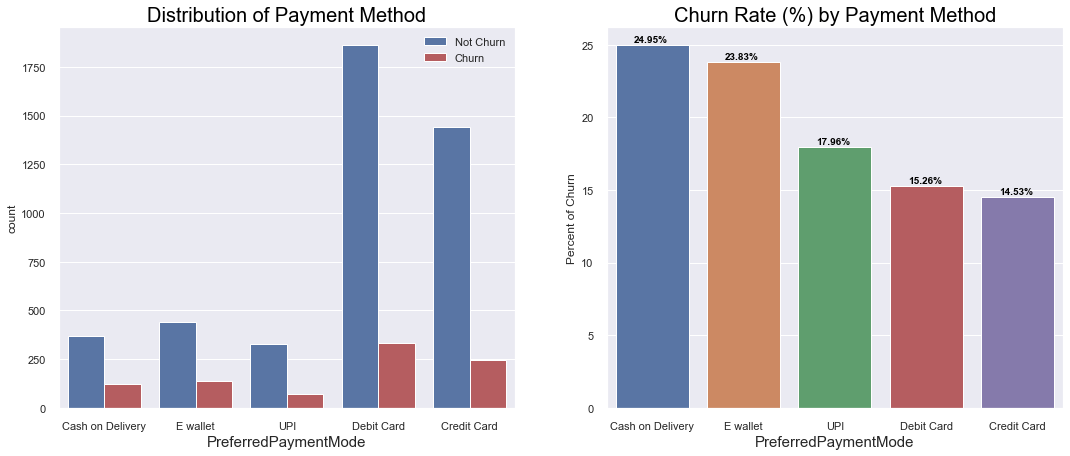

time: 1.16 s (started: 2022-02-06 14:31:44 +07:00)


In [26]:
univariate_analysis('PreferredPaymentMode', title='Payment Method')

##### Insight
- Debit Card menjadi metode pembayaran yang paling banyak digunakan oleh customer, yaitu sekitar 41%.
- Metode pembayaran Cash On Delivery menjadi metode dengan churn rate tertinggi dari semua metode yang tersedia, dengan churn rate sekitar 25%. 


#### Gender

        Gender  Total   % Values
Male      Male   3214  60.074766
Female  Female   2136  39.925234


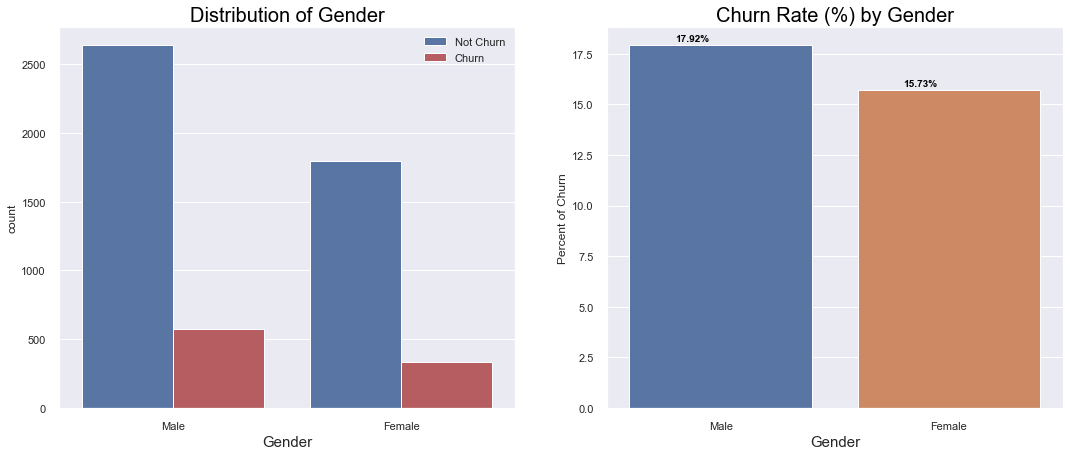

time: 781 ms (started: 2022-02-06 14:31:46 +07:00)


In [27]:
univariate_analysis('Gender', title='Gender')

##### Insight 
- Customer rata-rata berjenis kelamin laki-laki, dengan persentase sekitar 60% 
- Customer laki-laki memiliki churn rate lebih tinggi dari pada perempuan, dengan churn rate sekitar 17.92% dari total 3384 customer.
- Customer dengan jenis kelamin perempuan memiliki churn rate lebih rendah dari laki-laki, yaitu sekitar 15.73.

#### PreferredOrderCat

                      PreferedOrderCat  Total   % Values
Mobile Phone              Mobile Phone   2053  38.373832
Laptop & Accessory  Laptop & Accessory   2000  37.383178
Fashion                        Fashion    752  14.056075
Grocery                        Grocery    332   6.205607
Others                          Others    213   3.981308


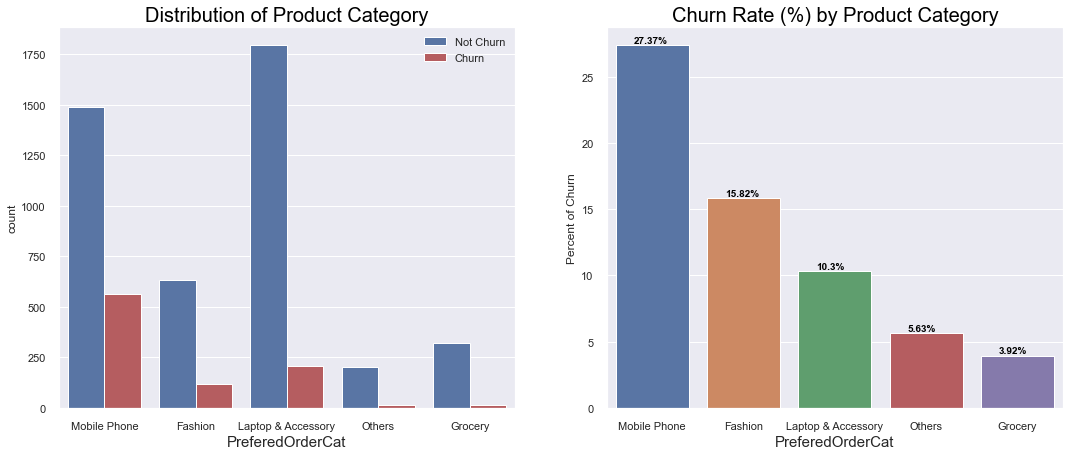

time: 1.28 s (started: 2022-02-06 14:31:47 +07:00)


In [28]:
univariate_analysis('PreferedOrderCat', title='Product Category')

##### Insight
- Mobile Phone menjadi barang yang paling banyak di order daripada lima kategori lain, yaitu sebanyak 2053 dengan persentase sekitar 38% dari keseluruhan kategori.
- Customer yang membeli Mobile Phone ternyata yang paling banyak mengalami churn, dengan churn rate sekitar 27.37%.

#### Total Complain by PreferredOrderCat

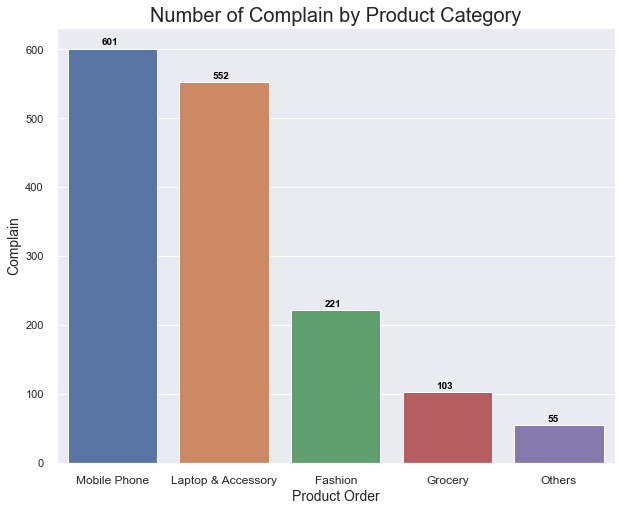

time: 922 ms (started: 2022-02-06 14:31:49 +07:00)


In [29]:
product_complain = df.groupby(["PreferedOrderCat"],as_index=False)["Complain"].sum().sort_values("Complain",ascending=False)

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))

x = np.arange(len(product_complain['PreferedOrderCat']))
y = product_complain['Complain']
for i, v in enumerate(y):
    ax.text(x[i]-0.1, v+5, str(v), fontsize = 10, color='black', fontweight='bold')

s = sns.barplot(data=product_complain, y="Complain",x="PreferedOrderCat", ax=ax)
ax.set_title("Number of Complain by Product Category", fontsize=20)
ax.set_ylabel("Complain",fontsize=14)
ax.set_xlabel("Product Order",fontsize=14)
s.set_xticklabels(s.get_xticklabels(), fontsize=12)
plt.show()

##### Insight
- Mobile Phone yaitu barang yang paling banyak mengalami komplain dari customer, dengan 601 total komplain.
- Laptop & Accessory barang kedua dengan total komplain terbanyak, yaitu sekitar 552 komplain.
- Jika kita perhatikan, barang dengan komplain terbanyak yaitu termasuk barang elektronik. Bisa jadi customer merasa kecewa dengan barang yang diterima, penyebabnya bisa jadi karena tidak sesuai pesanan, atau mengalami kerusakan dalam proses pengiriman.

#### Average Cashback Per Order by Product Category

In [30]:
df['avg_cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']

time: 0 ns (started: 2022-02-06 14:31:50 +07:00)


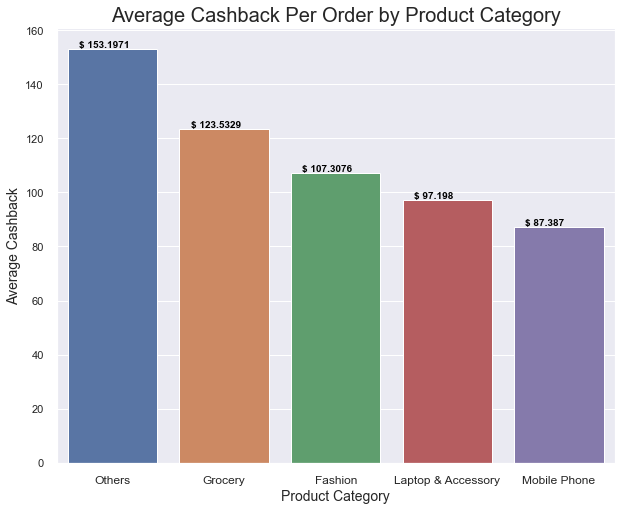

time: 609 ms (started: 2022-02-06 14:31:50 +07:00)


In [31]:
avg_cashback_product = df.groupby('PreferedOrderCat',as_index=False)["avg_cashback_per_order"].mean().sort_values('avg_cashback_per_order',ascending=False)
avg_cashback_product['avg_cashback_per_order'] = round(avg_cashback_product['avg_cashback_per_order'], 4)
#visualisasi

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))

x = np.arange(len(avg_cashback_product['PreferedOrderCat']))
y = avg_cashback_product['avg_cashback_per_order']
for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+0.3, '$ '+ str(v), fontsize = 10, color='black', fontweight='bold')

s = sns.barplot(data=avg_cashback_product, y="avg_cashback_per_order",x="PreferedOrderCat", ax=ax)
ax.set_title("Average Cashback Per Order by Product Category", fontsize=20)
ax.set_ylabel("Average Cashback",fontsize=14)
ax.set_xlabel("Product Category",fontsize=14)
s.set_xticklabels(s.get_xticklabels(), fontsize=12)
plt.show()

Jika kita lihat, rata rata cashback per order dan total komplain per kategori produk, kategori produk Mobile Phone memberikan rata rata cashback yang rendah dan juga memiliki total complain yang tinggi, sehingga hal ini mungkin saja penyebab terjadinya churn. Jika customer mendapatkan e-commerce dengan harga mobile phone yang lebih murah dan memberikan tawaran cashback yang lebih tinggi maka kemungkinan customer akan beralih ke e-commerce lain.

#### Marital Status

         MaritalStatus  Total   % Values
Married        Married   2825  52.803738
Single          Single   1722  32.186916
Divorced      Divorced    803  15.009346


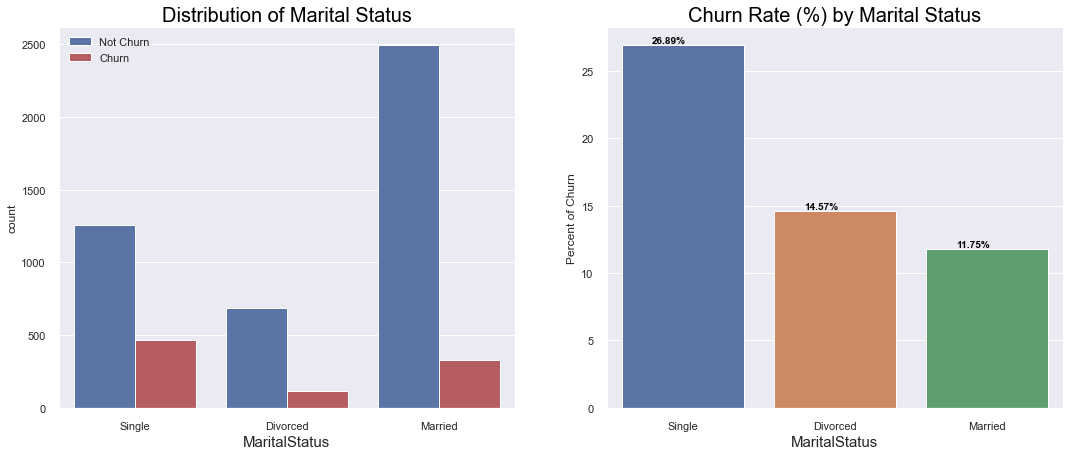

time: 1.34 s (started: 2022-02-06 14:31:51 +07:00)


In [32]:
univariate_analysis('MaritalStatus', title='Marital Status')

##### Insigth
- Sekitar 53% customer sudah berstatus menikah, dengan churn rate sekitar 11.75%
- Customer yang berstatus lajang menjadi customer dengan churn rate tertinggi, yaitu sekitar 26.9%  
- Meskipun lebih dari 50% customer sudah menikah, tetapi mereka cenderung tidak memiliki churn rate yang tinggi.

### Numerical Features

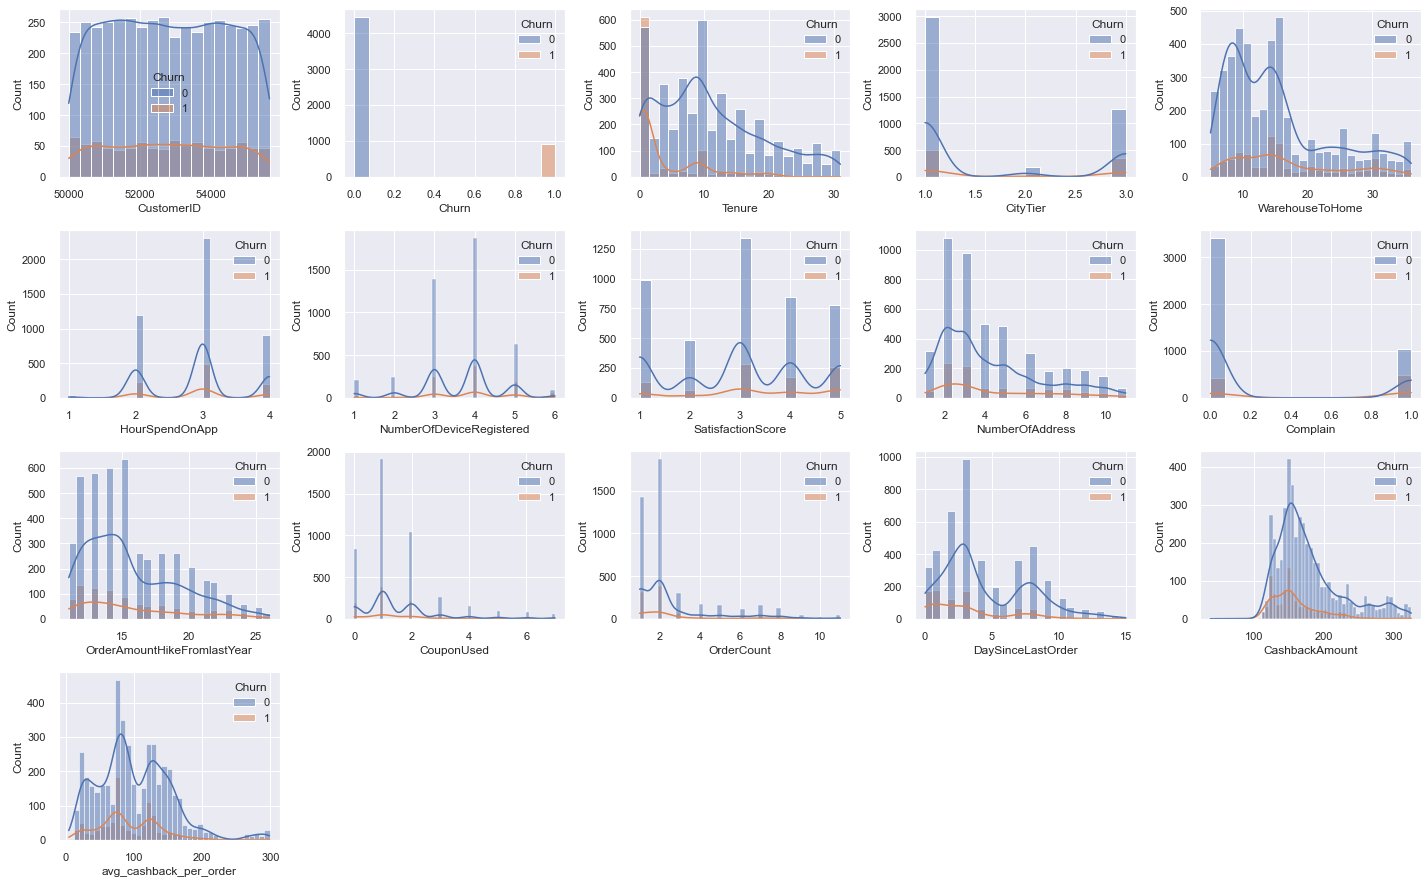

time: 22 s (started: 2022-02-06 14:31:53 +07:00)


In [33]:
#separated numeric and categorical column
num = df.select_dtypes(include=["number"]).columns

# Distribution of numerical features 
plt.figure(figsize=(20,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.histplot(data=df,x=df[num[i]],kde=True, hue='Churn')
    plt.tight_layout();

#### Tenure

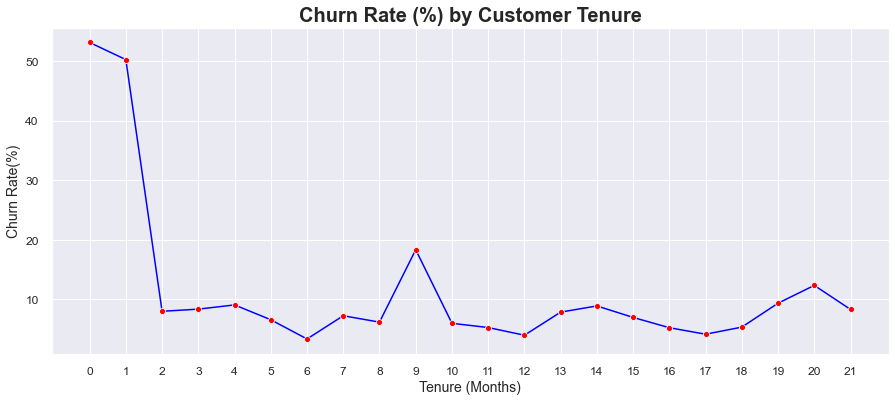

time: 610 ms (started: 2022-02-06 14:32:15 +07:00)


In [34]:
tenure_churn = df.groupby("Tenure",as_index=False)["Churn"].mean().sort_values("Churn",ascending=False)
tenure_churn['Churn'] = round(tenure_churn['Churn'] * 100, 2)
tenure_churn = tenure_churn[tenure_churn['Churn'] > 0]

#visualisasi
plt.figure(figsize=(15,6))
sns.lineplot(data=tenure_churn, y="Churn", x="Tenure", marker="o", markerfacecolor='red', color='blue')

plt.title("Churn Rate (%) by Customer Tenure",fontsize=20, fontweight='bold')
plt.xlabel("Tenure (Months)",fontsize=14)
plt.xticks(tenure_churn["Tenure"].values, fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

##### Insight
Adanya hubungan antara tenure dan churn rate, dimana ketika tenure customer lebih lama, churn rate mengalami penurunan. Churn rate tertinggi pada tenure 0 dan 1, kemudian mengalami penurunan ketika tenure customer meningkat. Jika dapat mempertahakan customer dengan waktu yang lama mungkin akan menyebabkan penurunan pada churn rate.

#### CityTier

   CityTier  Total   % Values
1         1   3485  65.140187
3         3   1627  30.411215
2         2    238   4.448598


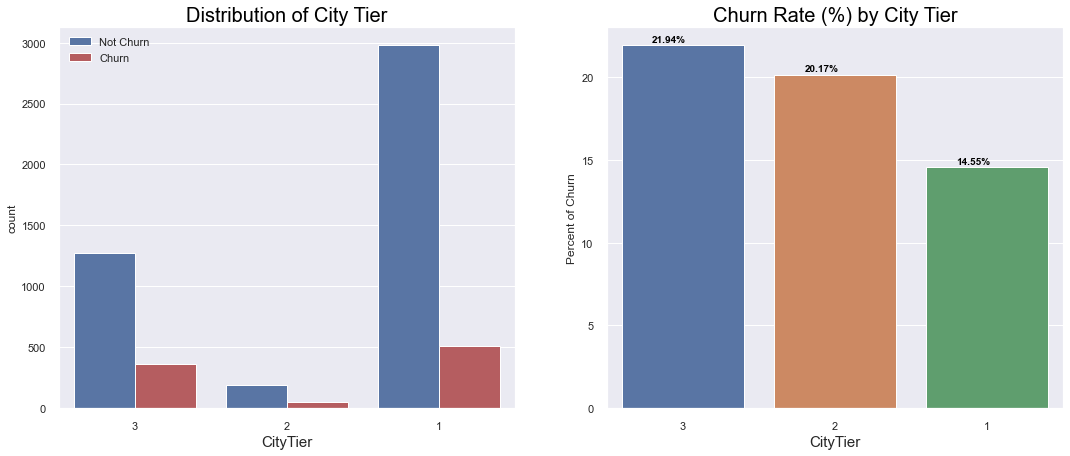

time: 843 ms (started: 2022-02-06 14:32:16 +07:00)


In [35]:
univariate_analysis('CityTier', title='City Tier')

##### Insight
- Customer dari CityTier 1 menjadi customer yang paling banyak, yaitu sekitar 65%.
- Customer dari CityTier 3 menjadi customer yang mengalami churn rate paling tinggi, yaitu sekitar 21.94%.
- Meskipun customer dari CityTier 1 paling banyak, tetapi memiliki churn rate customer yang paling rendah, yaitu sekitar 14.55%.  

#### WarehouseToHome

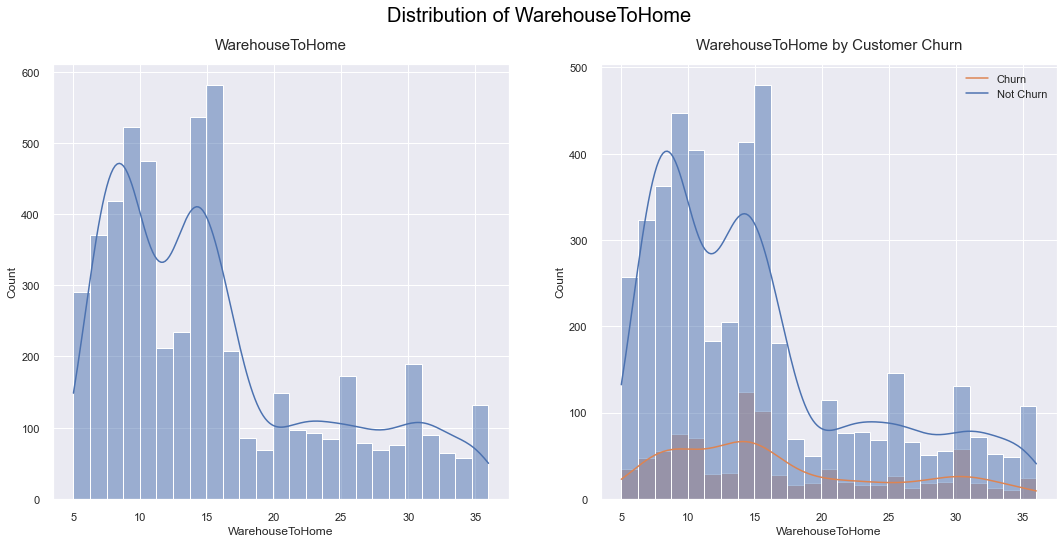

time: 1.75 s (started: 2022-02-06 14:32:17 +07:00)


In [36]:
univariate_analysis_num('WarehouseToHome')

##### Insight
- Distribusi jarak antara gudang dan rumah terlihat tidak terdistribusi normal.
- Rata-rata kebanyakan jarak antara gudang dan rumah yaitu dikisaran 5 - 20.
- Distribusi jarak gudang dan rumah antara customer yang churn dan tidak chun pun hampir sama.

#### HourSpendOnApp

   HourSpendOnApp  Total   % Values
3               3   2799  52.317757
2               2   1414  26.429907
4               4   1103  20.616822
1               1     34   0.635514


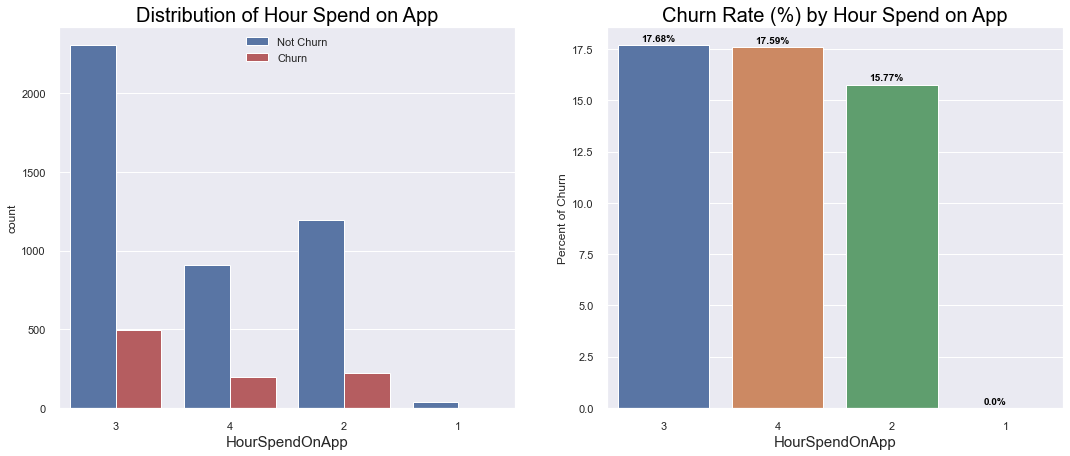

time: 984 ms (started: 2022-02-06 14:32:19 +07:00)


In [37]:
univariate_analysis('HourSpendOnApp', title='Hour Spend on App')

##### Insight
- Rata-rata customer menghabiskan waktu dalam aplikasi sekitar 3 jam dengan persentase sekitar 52%.
- Customer yang menghabiskan waktu dalam aplikasi selama 3 jam pun menjadi customer dengan persentase mengalami churn tertinggi, yaitu sekitar 17.68%.

#### NumberOfDeviceRegistered

   NumberOfDeviceRegistered  Total   % Values
4                         4   2245  41.962617
3                         3   1634  30.542056
5                         5    824  15.401869
2                         2    268   5.009346
1                         1    230   4.299065
6                         6    149   2.785047


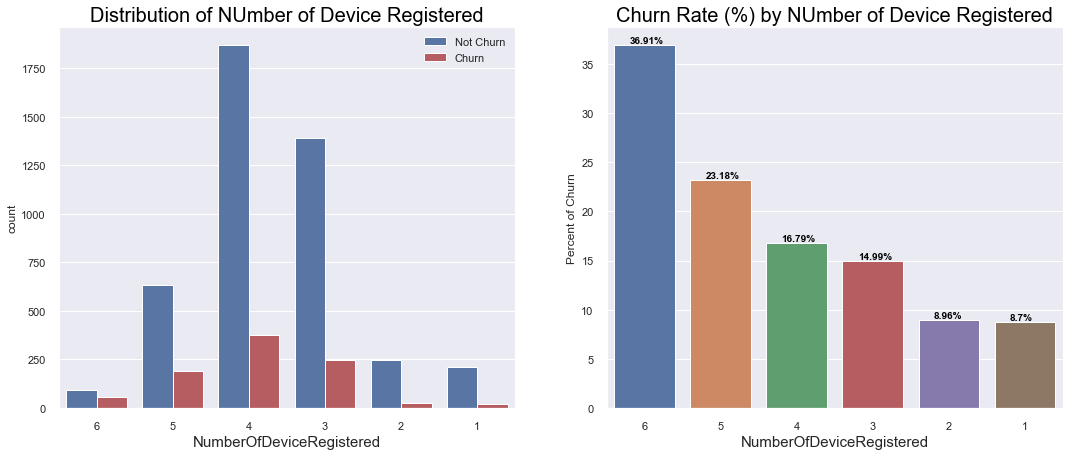

time: 781 ms (started: 2022-02-06 14:32:20 +07:00)


In [38]:
univariate_analysis('NumberOfDeviceRegistered', title='NUmber of Device Registered')

##### Insight
- Jumlah perangkat yang terdaftar paling banyak yaitu sebanyak 4 perangkat dengan frekuensi sebanyak 2377 dengan persentase sekitar 42% dari keseluruhan data.
- Customer dengan perangkat yang terdaftar sebanyak 6 yaitu customer dengan churn rate tertinggi, yaitu sekitar 36.91%.      

#### SatisfactionScore

   SatisfactionScore  Total   % Values
3                  3   1620  30.280374
1                  1   1118  20.897196
5                  5   1034  19.327103
4                  4   1024  19.140187
2                  2    554  10.355140


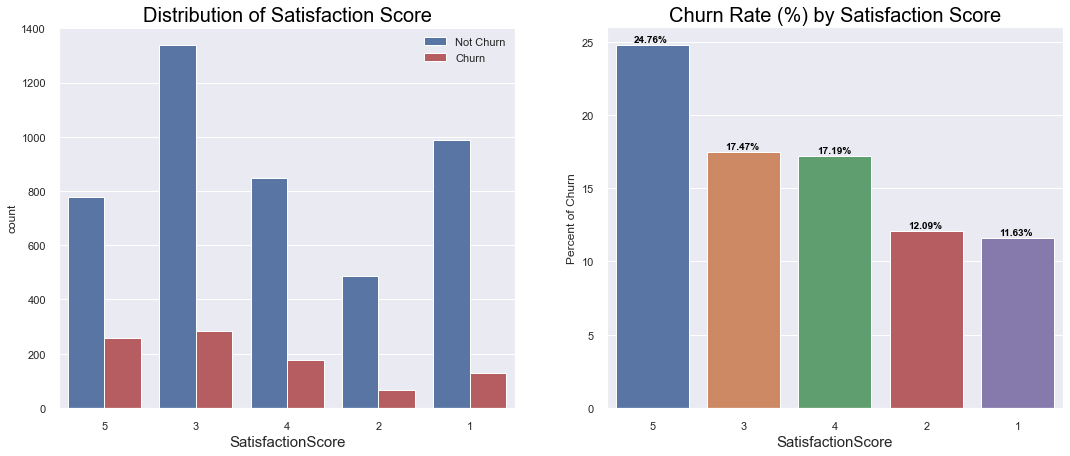

time: 1.22 s (started: 2022-02-06 14:32:21 +07:00)


In [39]:
univariate_analysis('SatisfactionScore', title='Satisfaction Score')

##### Insight
- Rata-rata customer memberikan nilai kepuasan dengan nilai 3, yaitu dengan persentase sekitar 30% dari keseluruhan data.
- Ternyata customer dengan nilai kepuasan 5 yang paling banyak mengalami churn, yaitu sekitatr 23%.

#### NumberOfAddress

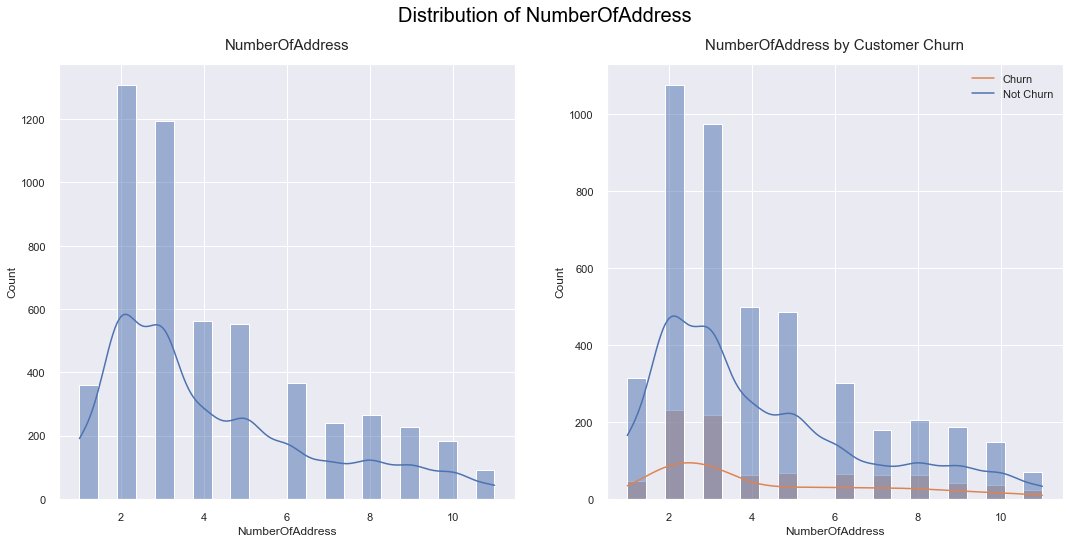

time: 1.84 s (started: 2022-02-06 14:32:23 +07:00)


In [40]:
univariate_analysis_num('NumberOfAddress')

##### Insight
- Distribusi jumlah alamat kebanyakan di kisaran 2-3 alamat.
- Distribusi jumlah alamat antara customer yang mengalami churn dan tidak selatih sama.

#### Complain

   Complain  Total   % Values
0         0   3818  71.364486
1         1   1532  28.635514


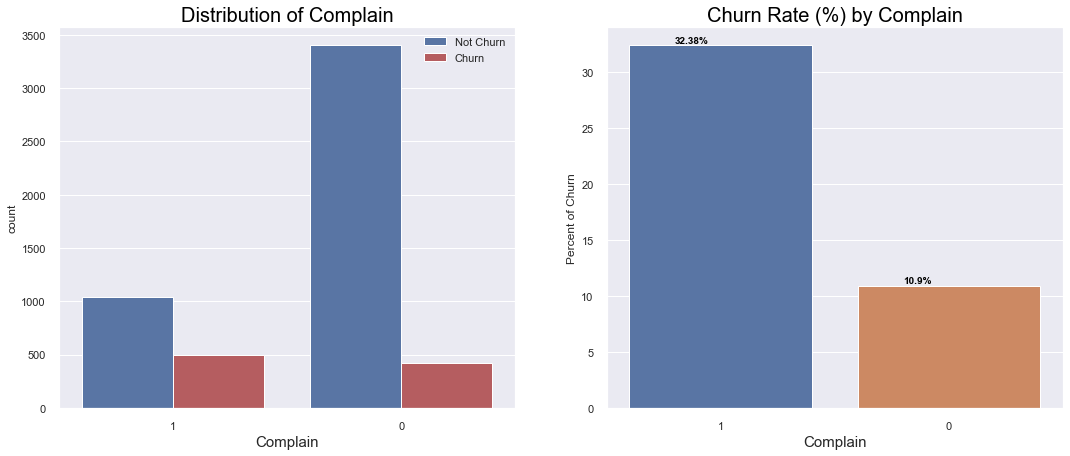

time: 1.12 s (started: 2022-02-06 14:32:25 +07:00)


In [41]:
univariate_analysis('Complain', title='Complain')

##### Insight
- Sebesar 71% menyatakan bahwa customer tidak memiliki keluhan pada saat melakukan transaksi.
- Customer yang mempunyai keluhan ternyata memiliki churn rate sekitar 32.38%. Ini cukup masuk akal, karena ketika customer memiliki keluhan kemungkinan customer tersebut akan churn pun semakin tinggi. 

#### OrderAmountHikeFromlastYear

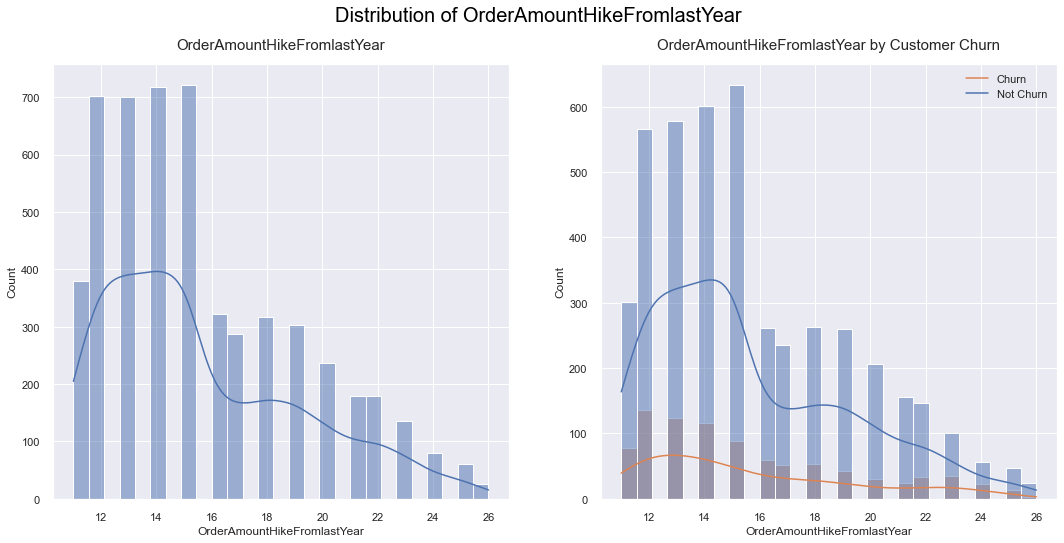

time: 1.77 s (started: 2022-02-06 14:32:26 +07:00)


In [42]:
univariate_analysis_num('OrderAmountHikeFromlastYear')

##### Insight
- Jumlah kenaikan pesanan dari tahun lalu ternyata paling banyak sekitar 12-15 jumlah order.
- Jumlah kenaikan pesanan dari tahun lalu untuk customer churn ternyata tidak terlalu signifikan, grafik cenderung jumlah kenaikan pesanan cenderung landai.

#### CouponUsed

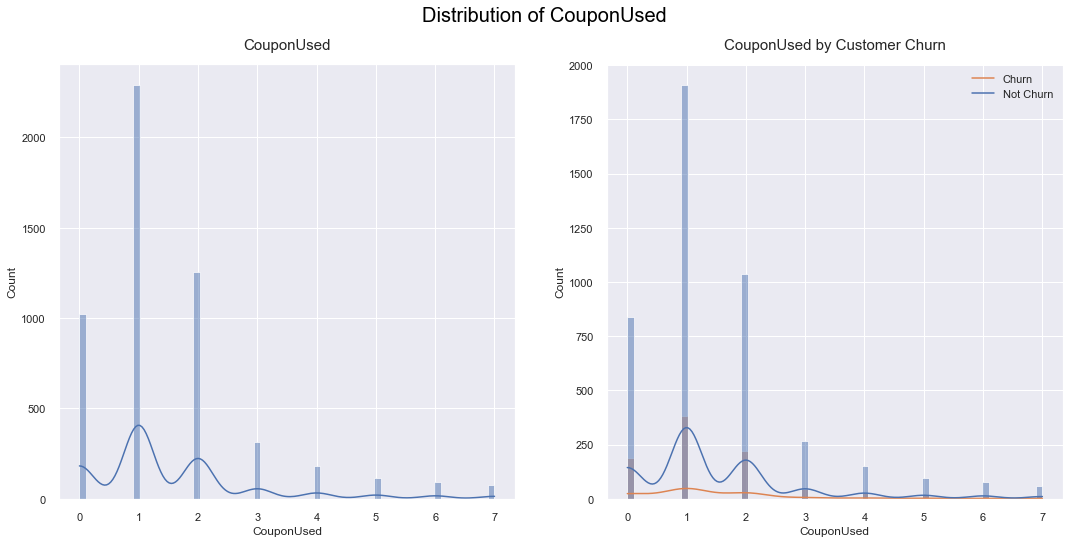

time: 1.67 s (started: 2022-02-06 14:32:28 +07:00)


In [43]:
univariate_analysis_num('CouponUsed')

##### Insight
- Rata-rata penggunaan kupon yang dilakukan oleh customer yaitu antara 0-2 kupon dengan frekuensi lebih dari 1000 kupon.
- Penggunan kupon Untuk customer yang mengalami churn dan tidak pun tren nya hampir sama, yaitu antara 0-2 kupon.

#### OrderCount

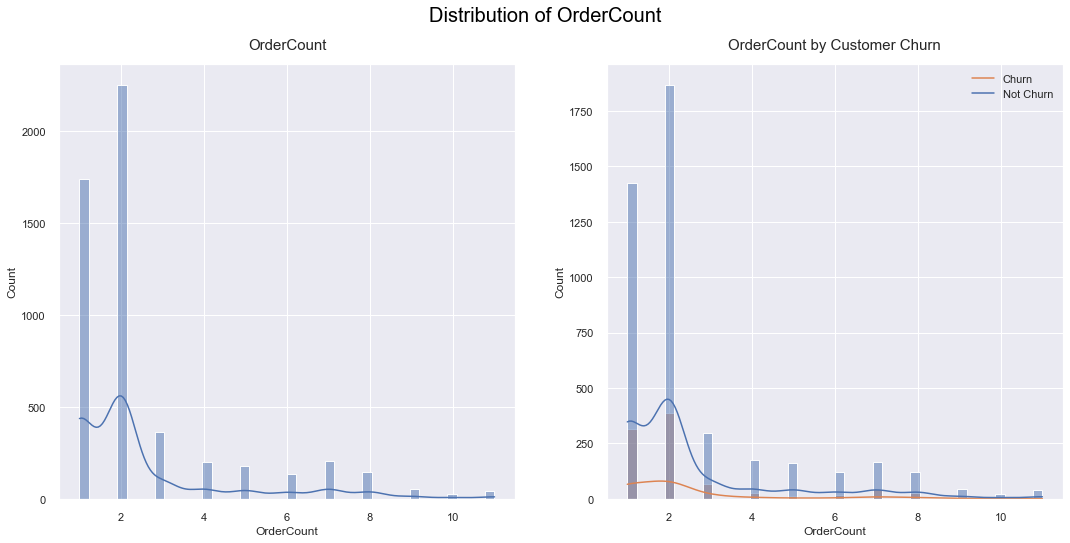

time: 1.56 s (started: 2022-02-06 14:32:30 +07:00)


In [44]:
univariate_analysis_num('OrderCount')

##### Insight
- Rata-rata jumlah order yang dilakukan customer yaitu sebanyal 1-2 order dengan frekuensi lebih dari 1500.
- Begitupun dengan jumlah order customer yang mengalami churn dan tidak, trennya sama, dengan jumlah order rata-rata sebanyak 1-2 order.


#### DaySinceLastOrder

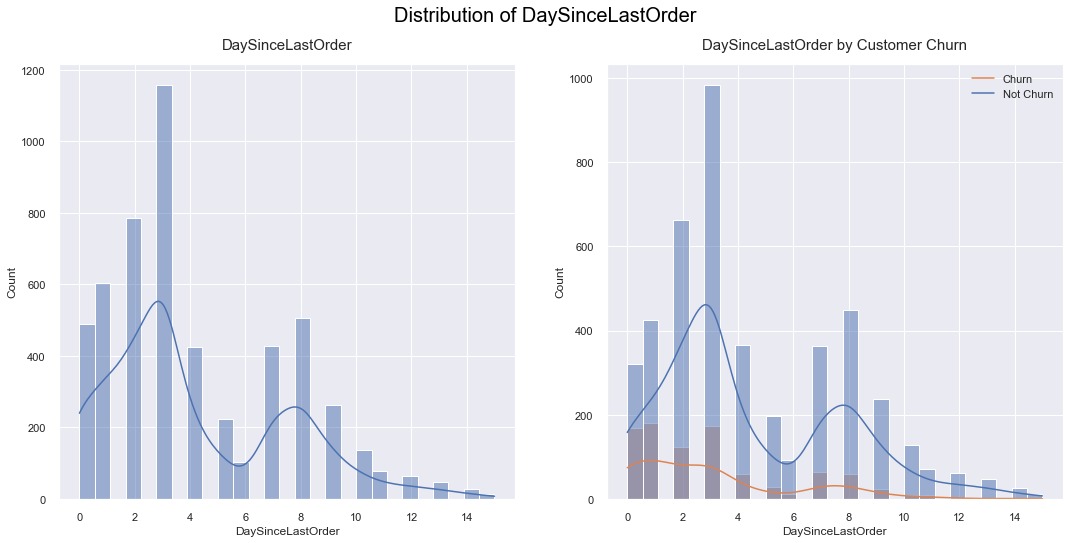

time: 1.19 s (started: 2022-02-06 14:32:32 +07:00)


In [45]:
univariate_analysis_num('DaySinceLastOrder')

##### Insight
- Rata-rata jarak hari sejak pemesanan terakhir yaitu antara 0-4 hari dengan jumlah lebih dari 400.
- Rata-rata jarak hari sejak pemesanan terakhir antara customer yang churn dan tidak pun sekilas hampir sama, yaitu antara 0-4 hari

#### CashbackAmount

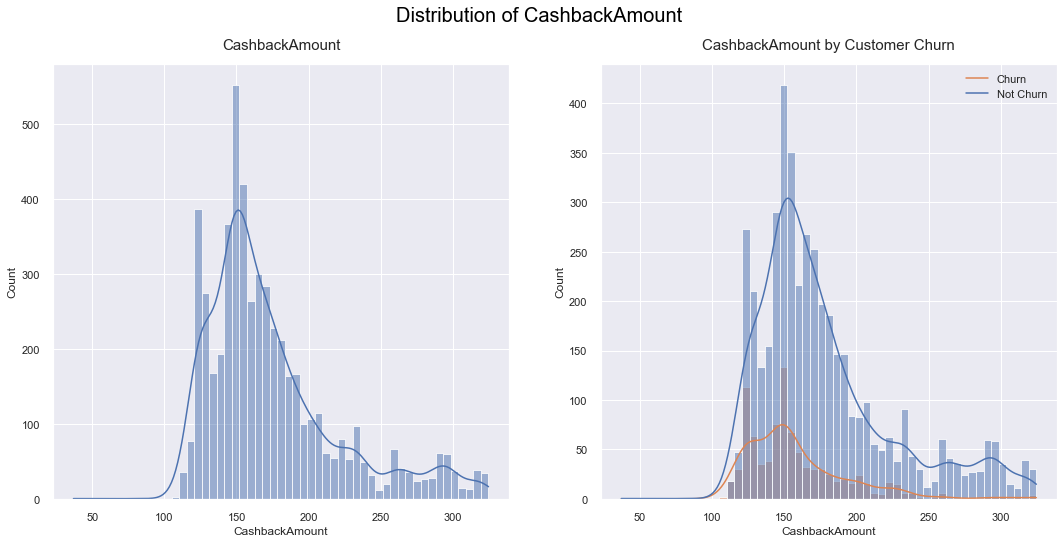

time: 1.78 s (started: 2022-02-06 14:32:33 +07:00)


In [46]:
univariate_analysis_num('CashbackAmount')

##### Insight
- Rata-rata jumlah cashback yang diterima customer yaitu sekitar 140-180.
- Rata-rata jumlah cashback yang diterima customer pada customer yang mengalami churn ternyata lebih sedikit, yaitu sekitar 120-170.

## Multivariate Analysis

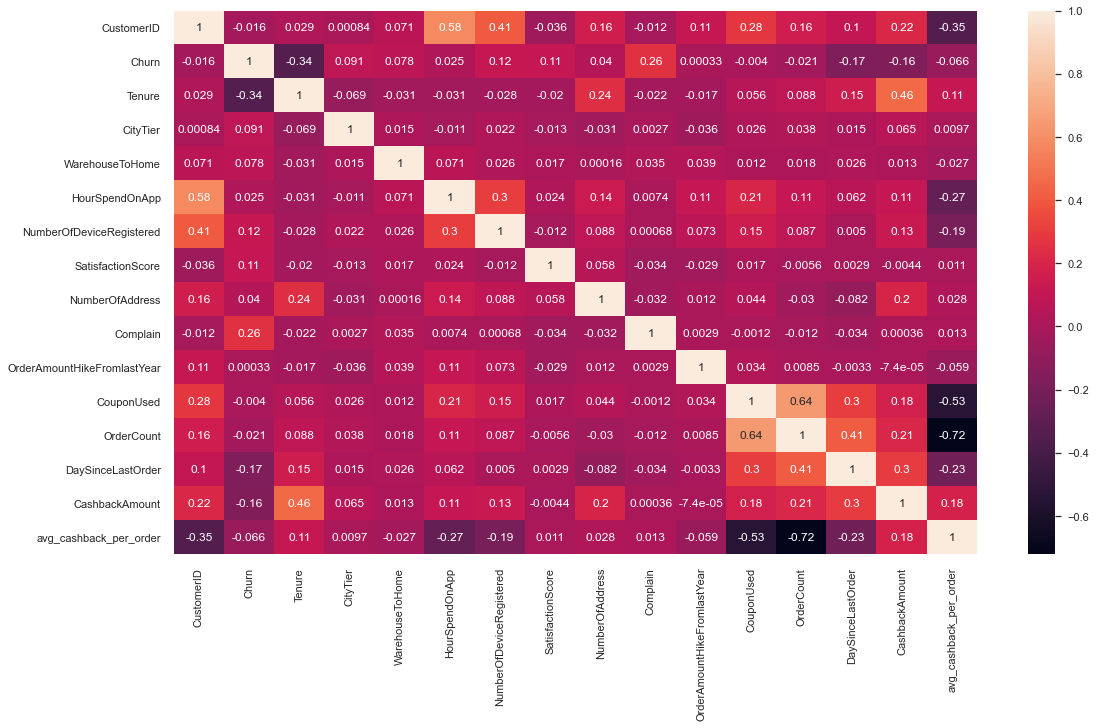

time: 6.88 s (started: 2022-02-06 14:32:36 +07:00)


In [47]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

##### Insight
- Dari hasil korelasi antar feature diatas, feature Complain memiliki korelasi positif cukup tinggi pada terhadap target, yaitu dengan nilai korelasi 0.25.
- Feature Tenure memiliki korelasi negatif yang cukup tinggi terhadap target dengan nilai korelasi -0.34.

## Add New Features

### Distance

Selanjutnya kita akan buat jarak dari gedung ke rumah menjadi beberapa kategori, yaitu short, middle, long.
- kurang dari sama dengan 10 = <10
- lebih dari 10 dan kurang dari sama dengan 20 = 10-20
- lebih dari 20 = >20

In [48]:
# Create new feature for distance
df['distance'] = np.select([df['WarehouseToHome'] > 20,
                                df['WarehouseToHome'] > 10,
                                df['WarehouseToHome'] <= 10],
                               ['>20', '10-20', '<10'])

time: 15 ms (started: 2022-02-06 14:32:43 +07:00)


      distance  Total   % Values
10-20    10-20   2214  41.383178
<10        <10   1858  34.728972
>20        >20   1278  23.887850


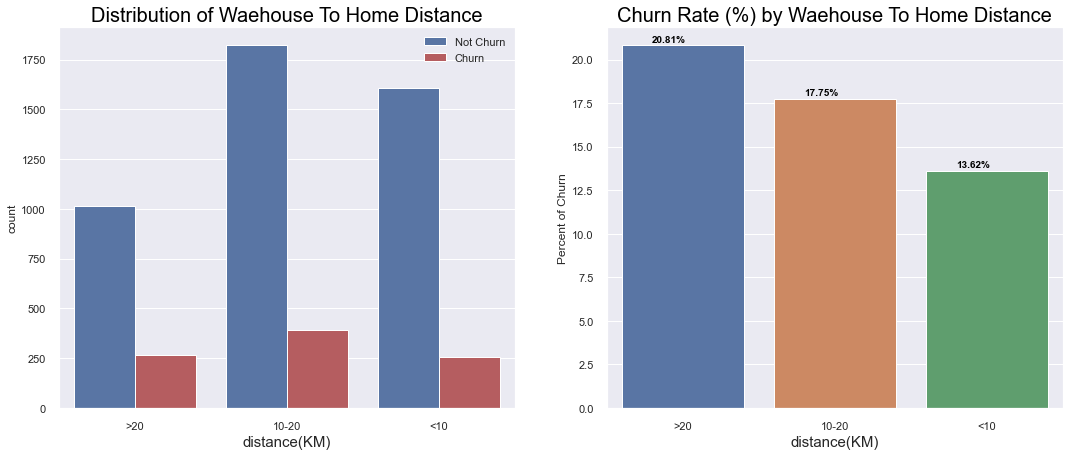

time: 953 ms (started: 2022-02-06 14:32:43 +07:00)


In [49]:
univariate_analysis('distance', title='Waehouse To Home Distance', xlabel='(KM)')

### Tenure Category

In [50]:
# Membuat klasifikasi tenure menjadi 0-12 bulan, 12-24 bulan dan >24 bulan
def cohort(tenure):
    if tenure < 13:
        return "0-12 months"
    elif tenure < 25:
        return "13-24 months"
    else:
        return ">24 months"

df["tenure_category"] = df["Tenure"].apply(cohort)

time: 0 ns (started: 2022-02-06 14:32:44 +07:00)


             tenure_category  Total   % Values
0-12 months      0-12 months   3651  68.242991
13-24 months    13-24 months   1319  24.654206
>24 months        >24 months    380   7.102804


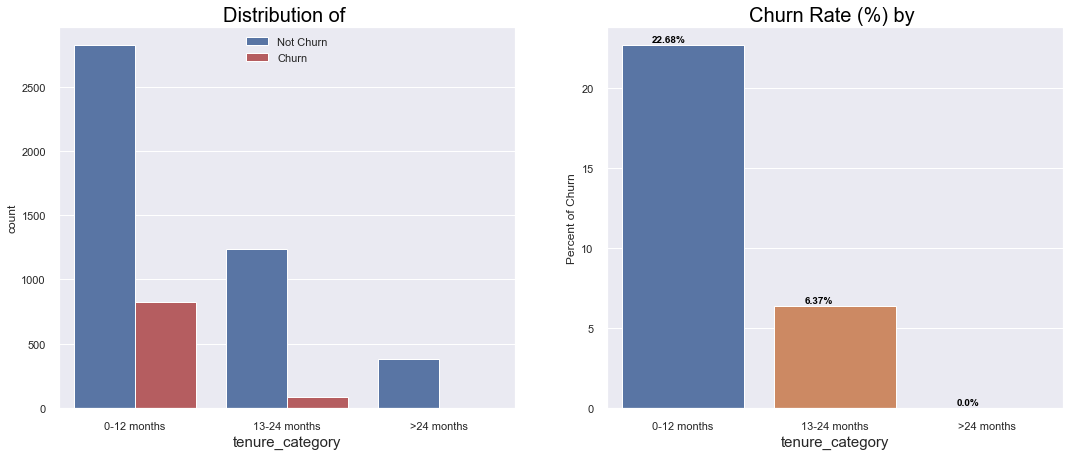

time: 1.14 s (started: 2022-02-06 14:32:44 +07:00)


In [51]:
univariate_analysis('tenure_category')

# Feature Engineering

### Remove Features
Kita akah menghapus feature yang dirasa tidak penting. Feature CustomerID akan kita hapus karena feature tersebut tidak akan kita butuhkan.

In [52]:
# Drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)

time: 0 ns (started: 2022-02-06 14:32:46 +07:00)


### Feature Encoding
Karena tidak semua model machine learning dapat menangani data kategorikal, maka kita akan rubah data kategorikal menjadi numerik.
Pada step ini akan dilakukan dua metode encoding, yaitu OrdialEncoding dan Ohe-Hot Encoding
- Ordinal Encoding dilakukan pada feature dengan kategori ordinal
- One-Hot Encoding dilakukan pada feature dengan kategori nominal 

In [53]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='distance', return_df=True,
                           mapping=[{'col':'distance', 
                           'mapping':{
                               None:0, 
                               'short':1, # short to 1
                               'middle':2, # middle to 2 
                               'long':3}}]) # long to 3

df = encoder.fit_transform(df)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,distance,tenure_category
0,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93,159.930,-1.0,0-12 months
1,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90,120.900,-1.0,0-12 months
2,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28,120.280,-1.0,0-12 months
3,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07,134.070,-1.0,0-12 months
4,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60,129.600,-1.0,0-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,Computer,1,30,Credit Card,Male,3,2,Laptop & Accessory,1,Married,6,0,18,1,2,4,150.71,75.355,-1.0,0-12 months
5626,0,13,Mobile Phone,1,13,Credit Card,Male,3,5,Fashion,5,Married,6,0,16,1,2,3,224.91,112.455,-1.0,13-24 months
5627,0,1,Mobile Phone,1,11,Debit Card,Male,3,2,Laptop & Accessory,4,Married,3,1,21,1,2,4,186.42,93.210,-1.0,0-12 months
5628,0,23,Computer,3,9,Credit Card,Male,4,5,Laptop & Accessory,4,Married,4,0,15,2,2,9,178.90,89.450,-1.0,13-24 months


time: 140 ms (started: 2022-02-06 14:32:46 +07:00)


In [54]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='tenure_category', return_df=True,
                           mapping=[{'col':'tenure_category', 
                           'mapping':{
                               None:0, 
                               '0-12 months':1, # short to 1
                               '13-24 months':2, # middle to 2 
                               '>24 months':3}}]) # long to 3

df = encoder.fit_transform(df)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,distance,tenure_category
0,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93,159.930,-1.0,1
1,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90,120.900,-1.0,1
2,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28,120.280,-1.0,1
3,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07,134.070,-1.0,1
4,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60,129.600,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,Computer,1,30,Credit Card,Male,3,2,Laptop & Accessory,1,Married,6,0,18,1,2,4,150.71,75.355,-1.0,1
5626,0,13,Mobile Phone,1,13,Credit Card,Male,3,5,Fashion,5,Married,6,0,16,1,2,3,224.91,112.455,-1.0,2
5627,0,1,Mobile Phone,1,11,Debit Card,Male,3,2,Laptop & Accessory,4,Married,3,1,21,1,2,4,186.42,93.210,-1.0,1
5628,0,23,Computer,3,9,Credit Card,Male,4,5,Laptop & Accessory,4,Married,4,0,15,2,2,9,178.90,89.450,-1.0,2


time: 79 ms (started: 2022-02-06 14:32:47 +07:00)


In [55]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

time: 0 ns (started: 2022-02-06 14:32:47 +07:00)


In [56]:
# One-Hot encoding using dummies
df = pd.get_dummies(df)
df

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,distance,tenure_category,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4,3,6,0,3,3,2,9,1,11,1,1,5,159.93,159.930,-1.0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,9,1,8,1,3,4,3,7,1,15,0,1,0,120.90,120.900,-1.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
2,1,9,1,30,1,2,4,3,6,1,14,0,1,3,120.28,120.280,-1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,1,0,3,15,1,2,4,5,8,0,23,0,1,3,134.07,134.070,-1.0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,0,1,12,1,3,3,5,3,0,11,1,1,3,129.60,129.600,-1.0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,1,30,1,3,2,1,6,0,18,1,2,4,150.71,75.355,-1.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
5626,0,13,1,13,1,3,5,5,6,0,16,1,2,3,224.91,112.455,-1.0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
5627,0,1,1,11,1,3,2,4,3,1,21,1,2,4,186.42,93.210,-1.0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
5628,0,23,3,9,1,4,5,4,4,0,15,2,2,9,178.90,89.450,-1.0,2,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


time: 125 ms (started: 2022-02-06 14:32:47 +07:00)


### Feature Scaling

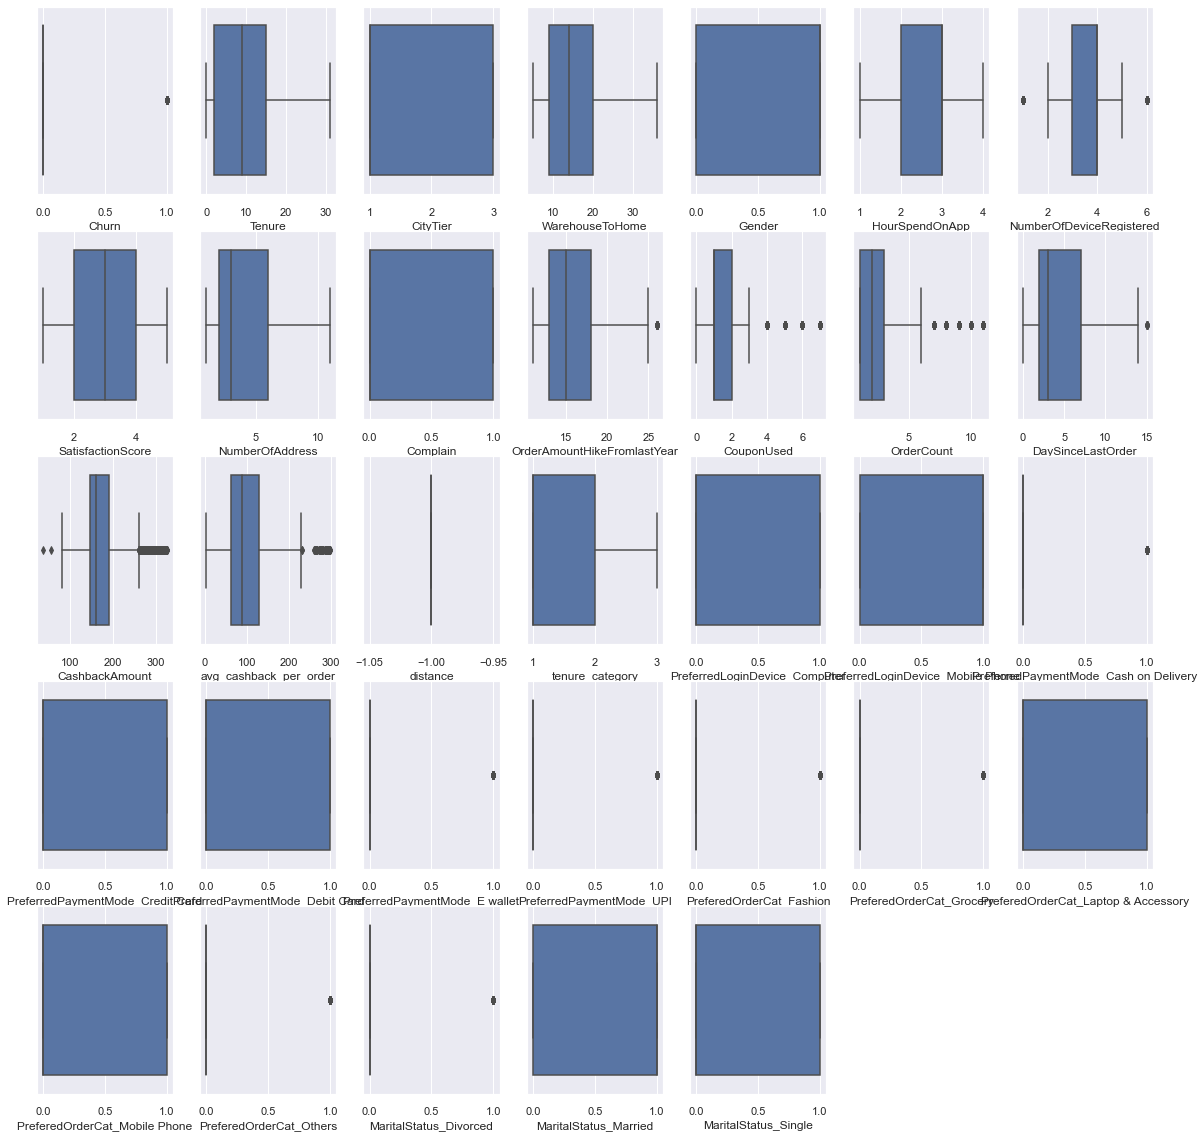

time: 8.49 s (started: 2022-02-06 14:32:48 +07:00)


In [57]:
# Plot distribution data using boxplot
num_col = df.select_dtypes('number').columns
plt.figure(figsize=(20, 20))
pos = 1

for i in num_col:
    plt.subplot(5, 7, pos)
    sns.boxplot(data=df, x=i)
    pos += 1


Karena pada data kita terdapat nilai outliers, maka lakukan scaling menggunakan RobustScaler.

In [58]:
# Feature scaling using RobustScaler
df[num_col] = RobustScaler().fit_transform(df[num_col])
df

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,distance,tenure_category,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,-0.384615,1.0,-0.727273,-1.0,0.0,-1.0,-0.5,1.50,1.0,-0.8,0.0,-0.5,0.4,-0.032265,1.060497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
1,1.0,0.000000,0.0,-0.545455,0.0,0.0,0.0,0.0,1.00,1.0,0.0,-1.0,-0.5,-0.6,-0.877436,0.473866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
2,1.0,0.000000,0.0,1.454545,0.0,-1.0,0.0,0.0,0.75,1.0,-0.2,-1.0,-0.5,0.0,-0.890862,0.464547,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
3,1.0,-0.692308,1.0,0.090909,0.0,-1.0,0.0,1.0,1.25,0.0,1.6,-1.0,-0.5,0.0,-0.592248,0.671815,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
4,1.0,-0.692308,0.0,-0.181818,0.0,0.0,-1.0,1.0,0.00,0.0,-0.8,0.0,-0.5,0.0,-0.689043,0.604629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.076923,0.0,1.454545,0.0,0.0,-2.0,-1.0,0.75,0.0,0.6,0.0,0.0,0.2,-0.231919,-0.210687,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5626,0.0,0.307692,0.0,-0.090909,0.0,0.0,1.0,1.0,0.75,0.0,0.2,0.0,0.0,0.0,1.374838,0.346936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5627,0.0,-0.615385,0.0,-0.272727,0.0,0.0,-2.0,0.5,0.00,1.0,1.2,0.0,0.0,0.2,0.541360,0.057679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5628,0.0,1.076923,1.0,-0.454545,0.0,1.0,1.0,0.5,0.25,0.0,0.0,1.0,0.0,1.2,0.378519,0.001165,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


time: 329 ms (started: 2022-02-06 14:32:57 +07:00)


# Sampling Dataset

## Separating Train and Test Set

In [59]:
# Separate feature and target
X = df.drop('Churn', axis=1)
y = df['Churn']

time: 16 ms (started: 2022-02-06 14:32:57 +07:00)


In [60]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (4280, 32)
Shape of y_train (4280,)
Shape of X_test (1070, 32)
Shape of y_test (1070,)
time: 15 ms (started: 2022-02-06 14:32:58 +07:00)


## Oversampling Using SMOTE
Karena pada target yang kita miliki terdapat imbalanced class, maka kita akan melakukan oversampling menggunakan metode SMOTE. Oversampling hanya dilakukan pada data training.

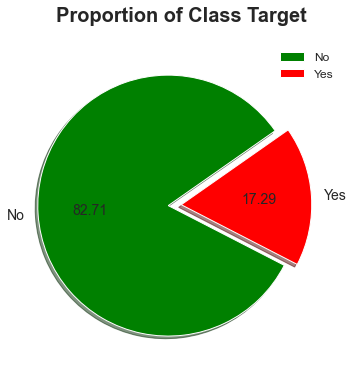

time: 641 ms (started: 2022-02-06 14:32:58 +07:00)


In [61]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["green","red"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

In [62]:
# oversampling
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

# distribution target after oversampling
pd.Series(y_train_over).value_counts()

1.0    3540
0.0    3540
Name: Churn, dtype: int64

time: 63 ms (started: 2022-02-06 14:32:59 +07:00)


# Modeling

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya.

## Choose the Best Classifier

In [63]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

time: 0 ns (started: 2022-02-06 14:32:59 +07:00)


### Cross Validation
Pada tahap ini kita lakukan training pada seluruh data menggunakan cross validation.

In [64]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

time: 43.3 s (started: 2022-02-06 14:33:00 +07:00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished


In [65]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.987850,0.983178,0.989720,0.974766,0.987850
RandomForestClassifier,0.996262,0.985047,0.988785,0.993458,0.987850
AdaBoostClassifier,0.888785,0.893458,0.900935,0.900000,0.900000
ExtraTreesClassifier,0.995327,0.988785,0.995327,0.996262,0.990654
GradientBoostingClassifier,0.916822,0.916822,0.926168,0.920561,0.927103
BaggingClassifier,0.983178,0.976636,0.975701,0.976636,0.978505
KNeighborsClassifier,0.929907,0.919626,0.907477,0.926168,0.929907
LogisticRegression,0.885981,0.893458,0.901869,0.898131,0.897196
GaussianNB,0.685047,0.707477,0.676636,0.661682,0.656075
SVC,0.905607,0.908411,0.910280,0.924299,0.920561


time: 47 ms (started: 2022-02-06 14:33:43 +07:00)


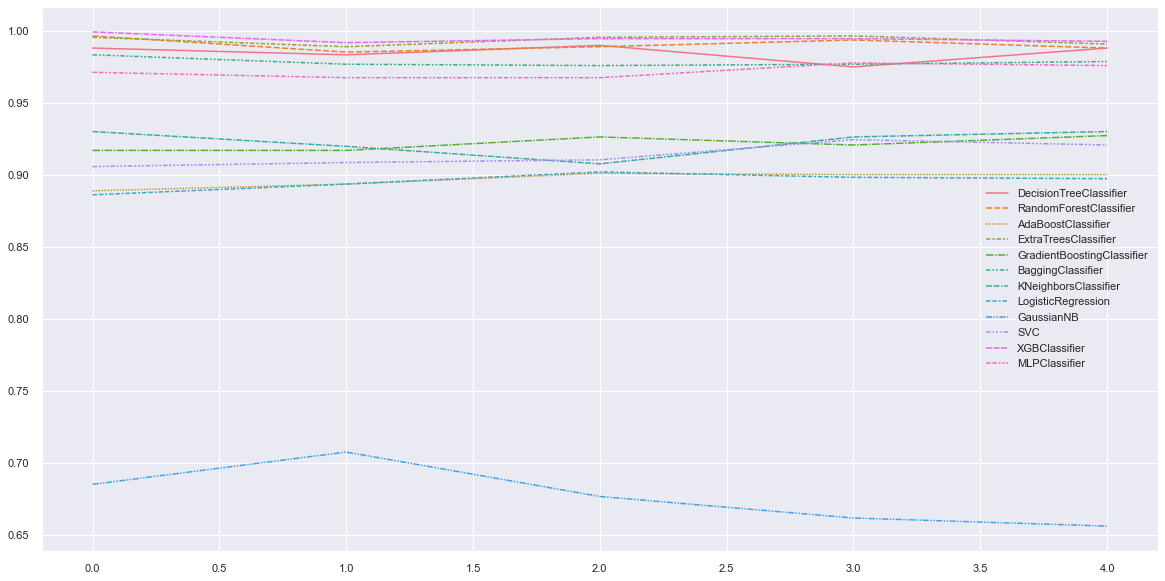

time: 937 ms (started: 2022-02-06 14:33:43 +07:00)


In [66]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [67]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

time: 0 ns (started: 2022-02-06 14:33:45 +07:00)


In [68]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

time: 0 ns (started: 2022-02-06 14:33:45 +07:00)


In [69]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
XGBClassifier,0.994393,0.002576
ExtraTreesClassifier,0.993271,0.002979
RandomForestClassifier,0.990280,0.004035
DecisionTreeClassifier,0.984673,0.005404
BaggingClassifier,0.978131,0.002683
MLPClassifier,0.971776,0.004238
KNeighborsClassifier,0.922617,0.008451
GradientBoostingClassifier,0.921495,0.004423
SVC,0.913832,0.007273
AdaBoostClassifier,0.896636,0.004751


time: 16 ms (started: 2022-02-06 14:33:45 +07:00)


Pada eksperimen diatas didapatkan nilai rata-rata akurasi dan standard deviasi nya dari setiap k-fold validation. XGBClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 97.69% dengan standard deviasi 0.007.

### Fit and Evaluation
Selain dengan menggunakan Cross Validation, saya juga melakukan uji nilai akurasi pada data training dan testing yang bertujuan untuk melihat akurasi saat data training dan testing dan perbedaaannya. Maka di dapatkan hasil sebagai berikut :

In [70]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train_over, y_train_over)
    # accuracy for training set
    train_score.append(model.score(X_train_over, y_train_over))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

time: 37.1 s (started: 2022-02-06 14:33:46 +07:00)


In [71]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
XGBClassifier,1.000000,0.976636,0.023364
ExtraTreesClassifier,1.000000,0.973832,0.026168
RandomForestClassifier,1.000000,0.967290,0.032710
DecisionTreeClassifier,1.000000,0.948598,0.051402
MLPClassifier,0.999435,0.982243,0.017192
BaggingClassifier,0.999011,0.952336,0.046675
SVC,0.954661,0.900935,0.053726
KNeighborsClassifier,0.948305,0.846729,0.101576
GradientBoostingClassifier,0.944209,0.921495,0.022714
AdaBoostClassifier,0.901695,0.872897,0.028798


time: 15 ms (started: 2022-02-06 14:34:23 +07:00)


Terlihat bahwa ExtraTreeClassifier memiliki perbedaan nilai akurasi terkecil, hanya selisih sekitar 1.5%. XGBClassifier menjadi model kedua yang memiliki peeforma terbaik dengan perbedaan sekitar 1.8%,  Gaussian Naive Bayer memiliki nilai akurasi yang cukup tinggi pada data training, yaitu sekitar 72%, tetapi memiliki nilai akurasi yang cukup kecil pada data testing dengan perbedaan mencapai 10%.

### Cross Validation for Some Metrics
Kali ini kita akan lakukan cross validation untuk mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [72]:
skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

time: 42.8 s (started: 2022-02-06 14:34:24 +07:00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.4s finished


In [73]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,XGBClassifier,2.514655,0.025586,0.994393,0.983622,0.983547,0.983546
1,ExtraTreesClassifier,1.206610,0.148457,0.993458,1.000000,0.961635,0.980344
2,RandomForestClassifier,1.376692,0.170867,0.989533,0.991036,0.947337,0.968458
3,DecisionTreeClassifier,0.086550,0.022365,0.985607,0.951505,0.964907,0.958101
4,BaggingClassifier,0.556066,0.027426,0.980374,0.963785,0.919972,0.941126
5,MLPClassifier,11.257185,0.022924,0.968224,0.936284,0.873945,0.903460
6,KNeighborsClassifier,0.009918,0.518106,0.922617,0.893178,0.620621,0.732242
7,GradientBoostingClassifier,2.162448,0.020611,0.921121,0.845352,0.658998,0.740171
8,SVC,1.362156,0.869904,0.913832,0.890933,0.563670,0.689508
9,AdaBoostClassifier,0.814248,0.065768,0.896636,0.750368,0.589996,0.659951


time: 47 ms (started: 2022-02-06 14:35:13 +07:00)


Dari hasil diatas, XGBClassifier memiliki nilai akurasi dan dan recall yang paling tinggi dari keseluruhan model. Pada kasus ini selain nilai akurasi yang kita perhitungkan, recall juga akan kita perhitungkan karena **kita lebih ingin model kita dapat mengklasifikasi lebih banyak False Positive(FP) daripada False Negative (FN)**. 
FP pada kasus ini yaitu model memprediksi customer akan mengalami churn, tetapi sebenarnya tidak churn. Maka FP lebih baik daripada FN. FN yaitu model memprediksi customer tidak akan churn tetapi sebenarnya churn, dan hal ini **dapat menyebabkan semakin banyak customer yang tidak bisa kita lakukan penawaran lebih lanjut sehingga mereka churn**.  

> Dari keseluruhan proses diatas, maka saya akan memilih model **XGBClassifier** karena memiliki nilai akurasi dan recall yang tertinggi.

## XBGClassifier
Pada tahap ini kita akan melakukan perbandingan performa model sebelum dan sesudah dilakukan feature selection.

### Default Parameter

In [74]:
# Fit classifier
xgb.fit(X_train_over, y_train_over)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 100.0%
Test Accuracy : 97.66%
Precision Score : 95.09%
Recall Score : 90.12%
F1 Score : 92.54%
time: 2.39 s (started: 2022-02-06 14:35:22 +07:00)


### RFE for Feature Selection

Pada tahap feature selection ini, kita akan lakukan menggunakan Recursive Feature Elimination. Nantinya akan didapatkan feature yang paling relevan dengan target.     

In [75]:
skf = StratifiedKFold(n_splits=5)

rfe = RFECV(xgb, cv=skf, scoring='accuracy', n_jobs=-1)
rfe = rfe.fit(X, y)

time: 1min 23s (started: 2022-02-06 14:35:28 +07:00)


Optimal number of features : 25


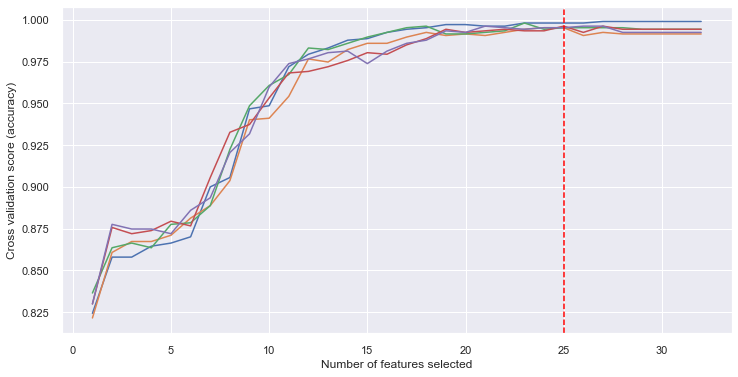

time: 719 ms (started: 2022-02-06 14:36:56 +07:00)


In [76]:
print("Optimal number of features : %d" % rfe.n_features_)

plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(rfe.grid_scores_) + 1),
    rfe.grid_scores_,
)
plt.axvline(x=rfe.n_features_, color='red', ls='--')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.show()

In [77]:
pd.DataFrame({'ranking':rfe.ranking_}, index=rfe.feature_names_in_).sort_values('ranking')

,ranking
Tenure,1
PreferedOrderCat_Others,1
PreferedOrderCat_Mobile Phone,1
PreferedOrderCat_Laptop & Accessory,1
PreferedOrderCat_Fashion,1
PreferredPaymentMode_UPI,1
PreferredPaymentMode_E wallet,1
PreferredPaymentMode_Credit Card,1
PreferredPaymentMode_Cash on Delivery,1
PreferredLoginDevice_Computer,1


time: 16 ms (started: 2022-02-06 14:37:03 +07:00)


In [78]:
# list of relevant features
relevant_column = list(X.columns[rfe.support_])

# Filtering feature from RFE
df_rfe = df[relevant_column]
# Assign target
df_rfe['Churn'] = y
df_rfe

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,PreferredLoginDevice_Computer,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn
0,-0.384615,1.0,-0.727273,-1.0,0.0,-1.0,-0.5,1.50,1.0,-0.8,-0.5,0.4,-0.032265,1.060497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,1.0
1,0.000000,0.0,-0.545455,0.0,0.0,0.0,0.0,1.00,1.0,0.0,-0.5,-0.6,-0.877436,0.473866,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0
2,0.000000,0.0,1.454545,0.0,-1.0,0.0,0.0,0.75,1.0,-0.2,-0.5,0.0,-0.890862,0.464547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0
3,-0.692308,1.0,0.090909,0.0,-1.0,0.0,1.0,1.25,0.0,1.6,-0.5,0.0,-0.592248,0.671815,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,1.0
4,-0.692308,0.0,-0.181818,0.0,0.0,-1.0,1.0,0.00,0.0,-0.8,-0.5,0.0,-0.689043,0.604629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.076923,0.0,1.454545,0.0,0.0,-2.0,-1.0,0.75,0.0,0.6,0.0,0.2,-0.231919,-0.210687,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5626,0.307692,0.0,-0.090909,0.0,0.0,1.0,1.0,0.75,0.0,0.2,0.0,0.0,1.374838,0.346936,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5627,-0.615385,0.0,-0.272727,0.0,0.0,-2.0,0.5,0.00,1.0,1.2,0.0,0.2,0.541360,0.057679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5628,1.076923,1.0,-0.454545,0.0,1.0,1.0,0.5,0.25,0.0,0.0,0.0,1.2,0.378519,0.001165,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


time: 94 ms (started: 2022-02-06 14:37:10 +07:00)


Dari hasil RFE diatas didapatkan sebanyak 25 feature yang paling relevan dalam memprediksi target.
Selanjutnya lakukan training data dari hasil RFE.

In [79]:
# Separate features and target
X_rfe = df_rfe.drop('Churn', axis=1)
y_rfe = df_rfe['Churn']

# Separate train and test set for modelling
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train_rfe.shape)
print('Shape of y_train', y_train_rfe.shape)
print('Shape of X_test', X_test_rfe.shape)
print('Shape of y_test', y_test_rfe.shape)

Shape of X_train (4280, 25)
Shape of y_train (4280,)
Shape of X_test (1070, 25)
Shape of y_test (1070,)
time: 16 ms (started: 2022-02-06 14:37:27 +07:00)


In [80]:
# Oversampling using SMOTE method
X_train_over_rfe, y_train_over_rfe = SMOTE().fit_resample(X_train_rfe, y_train_rfe)

# pd.Series(X_train_over_rfe).value_counts()

time: 63 ms (started: 2022-02-06 14:37:36 +07:00)


In [105]:
xgb_rfe = XGBClassifier(eval_metric='error')
# Fit classifier
xgb_rfe.fit(X_train_over_rfe, y_train_over_rfe)

# Predict test set
y_pred_rfe = xgb_rfe.predict(X_test_rfe)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe = round((xgb_rfe.score(X_train_over_rfe, y_train_over_rfe) * 100), 2)
test_score_rfe = round((xgb_rfe.score(X_test_rfe, y_test_rfe) * 100), 2)
prec_score_rfe = round((precision_score(y_test_rfe, y_pred_rfe)) * 100, 2)
recall_score_rfe = round((recall_score(y_test_rfe, y_pred_rfe)) * 100, 2)
f1_rfe = round(f1_score(y_test_rfe, y_pred_rfe)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe))
print('Test Accuracy : {}%'.format(test_score_rfe))
print('Precision Score : {}%'.format(prec_score_rfe))
print('Recall Score : {}%'.format(recall_score_rfe))
print('F1 Score : {}%'.format(f1_rfe))

Training Accuracy : 100.0%
Test Accuracy : 97.76%
Precision Score : 94.05%
Recall Score : 91.86%
F1 Score : 92.94%
time: 2.17 s (started: 2022-02-06 15:10:58 +07:00)


In [106]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe],
    'test_acc':[test_score_def, test_score_rfe],
    'precision':[prec_score_def, prec_score_rfe],
    'recall':[recall_score_def, recall_score_rfe],
    'f1-score':[f1_def, f1_rfe]}, index=['without_rfe', 'with_rfe'])

,train_acc,test_acc,precision,recall,f1-score
without_rfe,100.0,97.66,95.09,90.12,92.54
with_rfe,100.0,97.76,94.05,91.86,92.94


time: 15 ms (started: 2022-02-06 15:11:07 +07:00)


Setelah dilakukan feature selection, ternyata didapatkan performa model yang lebih baik dari sebelum melakukan feature selection.

### Hyperparameter Tuning

Lakukan tuning parameter untuk memilih parameter terbaik yang akan digunakan. Metode tuning yang digunakan yaitu Random Search CV. Random Search CV dipilih karena lebih mudah dan murah pada sisi komputasi.

In [89]:
params = {
    'booster':['gbtree', 'gblinear', 'dart'],
    'eta':[0.1, 0.01, 0.001, 0.0001],
    'gamma':[0.1, 0.01, 0.001, 0.0001],
    'max_depth':range(10, 101, 5),
    'min_child_weight':range(0, 51, 5),
    'tree_method':['gpu_hist', 'auto', 'approx', 'exact', 'hist'],
    'scale_pos_weight':range(0, 31, 3),
    'max_delta_step':range(10, 201, 5),
    'max_leaves':range(0, 51, 5),
    'eval_metric':['logloss', 'error', 'auc'],
    'sampling_method':['gradient_based', 'uniform'],
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=params, 
    n_iter=100,
    scoring='accuracy', cv=5, 
    n_jobs=-1)

time: 0 ns (started: 2022-02-06 14:46:20 +07:00)


In [90]:
xgb_tuned.fit(X_train_over_rfe, y_train_over_rfe)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'eval_metric': ['logloss', 'error',
                                                        'auc'],
                                        '

time: 13min 27s (started: 2022-02-06 14:46:22 +07:00)


In [91]:
# best estimator for xgboost
xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='error', gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=140, max_depth=80,
              max_leaves=20, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, sampling_method='uniform',
              scale_pos_weight=30, subsample=1, tree_method='exact', ...)

time: 15 ms (started: 2022-02-06 15:00:14 +07:00)


In [92]:
# Predict test set
y_pred_rfe_tuned = xgb_tuned.predict(X_test_rfe)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe_tuned = round((xgb_tuned.score(X_train_over_rfe, y_train_over_rfe) * 100), 2)
test_score_rfe_tuned = round((xgb_tuned.score(X_test_rfe, y_test_rfe) * 100), 2)
prec_score_rfe_tuned = round((precision_score(y_test_rfe, y_pred_rfe_tuned)) * 100, 2)
recall_score_rfe_tuned = round((recall_score(y_test_rfe, y_pred_rfe_tuned)) * 100, 2)
f1_rfe_tuned = round(f1_score(y_test_rfe, y_pred_rfe_tuned)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe_tuned))
print('Test Accuracy : {}%'.format(test_score_rfe_tuned))
print('Precision Score : {}%'.format(prec_score_rfe_tuned))
print('Recall Score : {}%'.format(recall_score_rfe_tuned))
print('F1 Score : {}%'.format(f1_rfe_tuned))

Training Accuracy : 99.49%
Test Accuracy : 94.3%
Precision Score : 75.34%
Recall Score : 95.93%
F1 Score : 84.4%
time: 1.11 s (started: 2022-02-06 15:00:37 +07:00)


In [94]:
pd.DataFrame({
    'train_acc':[train_score_rfe, train_score_rfe_tuned],
    'test_acc':[test_score_rfe, test_score_rfe_tuned],
    'precision':[prec_score_rfe, prec_score_rfe_tuned],
    'recall':[recall_score_rfe, recall_score_rfe_tuned],
    'f1-score':[f1_rfe, f1_rfe_tuned]}, index=['xgb_rfe', 'xgb_rfe_tuned'])

,train_acc,test_acc,precision,recall,f1-score
xgb_rfe,100.00,97.76,94.05,91.86,92.94
xgb_rfe_tuned,99.49,94.30,75.34,95.93,84.40


time: 31 ms (started: 2022-02-06 15:02:19 +07:00)


Setelah dilakukan hyperparameter tuning, ternyata model mengalami penurunan nilai akurasi, precision, dan f1-score, tetapi pada nilai recall mengalami peningkatan sekitar 4%. Karena secara keseluruhan model mengalami penurunan performa, maka kita akan menggunakan default parameter. 

# Model Evaluation

Lakukan evaluasi terhadap model, seperti melihat confusion matrix, classification report dan feature importance hasil  training.

## Confusion Matrix

[[888  10]
 [ 14 158]]


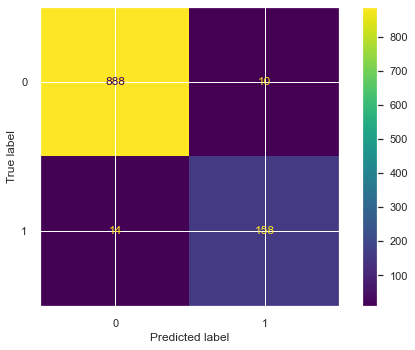

time: 485 ms (started: 2022-02-06 15:11:32 +07:00)


In [109]:
# Confusion Matrix
cm = confusion_matrix(y_test_rfe, y_pred_rfe)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Classification Report

In [110]:
# Classification report model
cr = classification_report(y_test_rfe, y_pred_rfe)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       898
         1.0       0.94      0.92      0.93       172

    accuracy                           0.98      1070
   macro avg       0.96      0.95      0.96      1070
weighted avg       0.98      0.98      0.98      1070

time: 16 ms (started: 2022-02-06 15:11:40 +07:00)


## Precision Recall and ROC Curve

In [111]:
# Precision Recall Curve
y_pred_rfe = xgb_rfe.predict_proba(X_test_rfe)[:,1]
prec, recall, _ = precision_recall_curve(y_test_rfe, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

time: 15 ms (started: 2022-02-06 15:11:53 +07:00)


In [112]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_rfe, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

time: 0 ns (started: 2022-02-06 15:12:12 +07:00)


ROC AUC Score is : 0.9956039260371887


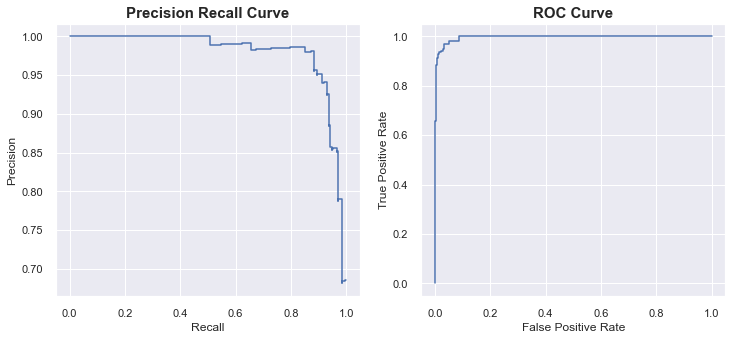

time: 766 ms (started: 2022-02-06 15:12:17 +07:00)


In [113]:
# roc auc score
auc_score = roc_auc_score(y_test_rfe, y_pred_rfe)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

## Feature Importance

In [115]:
feature_importance = pd.DataFrame({
    'Features':X_rfe.columns,
    'Importance':xgb_rfe.feature_importances_}).sort_values('Importance', ascending=False)

time: 31 ms (started: 2022-02-06 15:12:59 +07:00)


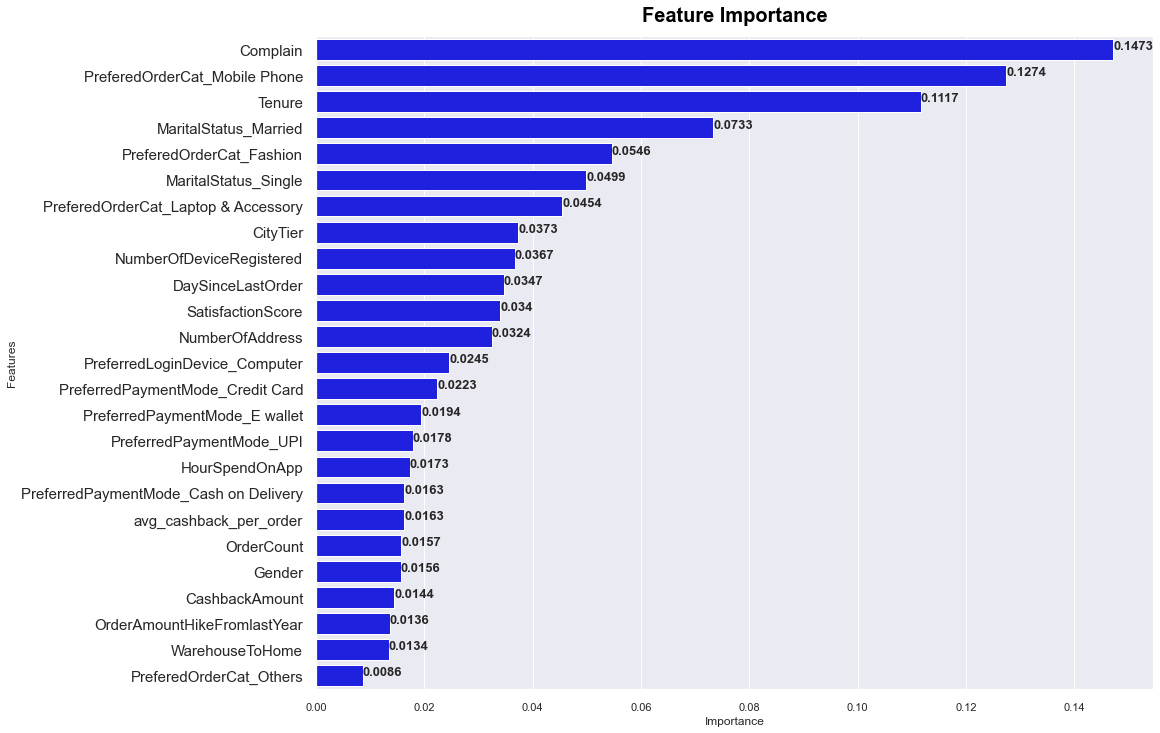

time: 1.86 s (started: 2022-02-06 15:13:05 +07:00)


In [116]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='blue')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

## Thresholds Adjustment

Selanjutnya kita akan lakukan pemilihan thresholds untuk memilih nilai thresholds terbaik dengan menggunakan DiscriminationThreshold.

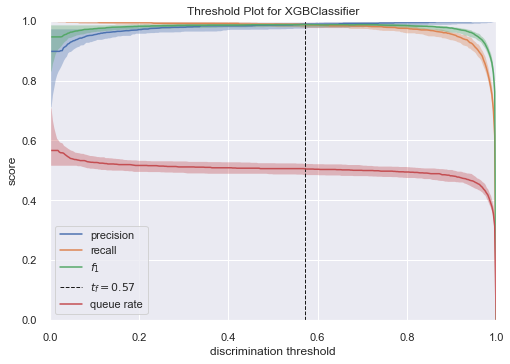

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

time: 1min 13s (started: 2022-02-06 15:13:47 +07:00)


In [117]:
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(xgb_rfe)

# Fit the data to the visualizer
visualizer.fit(X_train_over_rfe, y_train_over_rfe)        
# Finalize and render the figure
visualizer.show()           

Dari hasil discrimination threshold diatas didapatkan thresholds paling ideal, yaitu 0.57.  
Maka setelah didapatkan thresholds yang optimal, maka thresholds tersebut kita gunakan untuk klasifikasi.
- Jika lebih dari nilai tersebut maka termasuk "Churn (1)"
- JIka sebaliknya berarti "Not Churn (0)".

In [119]:
# Create dataframe for appying thresholds
y_pred_final = pd.DataFrame({'Churn':y_test_rfe.values, 'Churn_Prob':y_pred_rfe})
y_pred_final['final_prediction'] = y_pred_final['Churn_Prob'].apply(lambda x: 1 if x > 0.57 else 0)
y_pred_final.head(10)

,Churn,Churn_Prob,final_prediction
0,0.0,0.014778,0
1,0.0,0.013466,0
2,0.0,0.009715,0
3,0.0,0.000434,0
4,0.0,0.000943,0
5,0.0,0.000358,0
6,0.0,0.000254,0
7,0.0,0.000356,0
8,0.0,0.000294,0
9,0.0,0.000807,0


time: 32 ms (started: 2022-02-06 15:15:48 +07:00)


### Confusion Matrix

[[889   9]
 [ 15 157]]


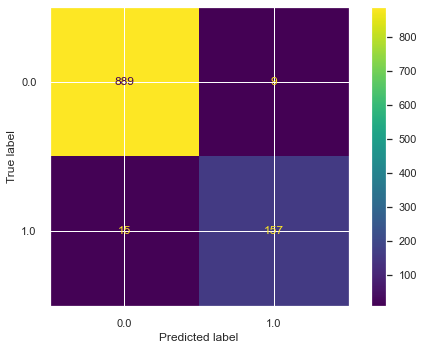

time: 500 ms (started: 2022-02-06 15:15:57 +07:00)


In [120]:
# Confusion Matrix
cm = confusion_matrix(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cm)
# Plotting confusion matrix
ConfusionMatrixDisplay(cm, display_labels=xgb_rfe.classes_).plot()
plt.show()

Dari hasil thresholds adjusment dapat dilihat bahwa hasilnya terdapat 889 berhasil diklasifikasi sebagai class 0 (Not Churn) dan sebanyak 157 diklasifikasi sebagai class 1 (Churn).

### Classification Report

In [121]:
# Classification Report
cr = classification_report(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       898
         1.0       0.95      0.91      0.93       172

    accuracy                           0.98      1070
   macro avg       0.96      0.95      0.96      1070
weighted avg       0.98      0.98      0.98      1070

time: 15 ms (started: 2022-02-06 15:16:03 +07:00)


In [122]:
# Model performance after thresholds adjustment
acc_score_th = round(accuracy_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
prec_score_th = round(precision_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
recall_score_th = round(recall_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
f1_th = round(f1_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)

time: 16 ms (started: 2022-02-06 15:16:06 +07:00)


In [123]:
pd.DataFrame({
    'accuracy':[test_score_rfe, acc_score_th],
    'precision':[prec_score_rfe, prec_score_th],
    'recall':[recall_score_rfe, recall_score_th],
    'f1-score':[f1_rfe, f1_th]}, index=['default thresholds', 'thresholds adjusment'])

,accuracy,precision,recall,f1-score
default thresholds,97.76,94.05,91.86,92.94
thresholds adjusment,97.76,94.58,91.28,92.90


time: 16 ms (started: 2022-02-06 15:16:10 +07:00)


Ternyata setelah dilakukan thresholds adjustment, hasil yang didapatkan mengalami penurunan performa, maka kita tidak akan menggunakan nilai thresholds tersebut. 

# Save Model

In [124]:
filename = 'xgb_model.sav'
pickle.dump(xgb_rfe, open(filename, 'wb'))

time: 47 ms (started: 2022-02-06 15:16:38 +07:00)
